In [8]:
#I want to visualize the receival of rm_id over time in a time series plot, to see if there are any trends or seasonality. I want to make a function that
# takes in rm_id as an argument and plots the time series for that specific rm_id by using receivals in /data/kernel/receivals.csv
import pandas as pd
import matplotlib.pyplot as plt

# Load data
receivals = pd.read_csv('../data_cleaned/receivals_cleaned.csv', parse_dates=['date_arrival'])

#plot data for specific rm_id
def plot_rm_id_time_series(rm_id):
    df = receivals[receivals['rm_id'] == rm_id]
    df = df.set_index('date_arrival').resample('D').sum().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['date_arrival'], df['net_weight'], marker='o')
    plt.title(f'Time Series of Net Weight for RM_ID: {rm_id}')
    plt.xlabel('Date Arrival')
    plt.ylabel('Net Weight')
    plt.grid(True)
    plt.show()

# I want to check all the unique rm_ids from the last year in receival
print(f"This is receivals cleaned:  \n{receivals[receivals['date_arrival'] >= '2024-01-01']['rm_id'].unique()}")

receival_test = pd.read_csv('../data/kernel/receivals.csv', parse_dates=['date_arrival'])
receival_test['date_arrival'] = pd.to_datetime(receival_test['date_arrival'], utc=True).dt.tz_convert('Etc/GMT-2')

# THIS IS FOR UNCLEANED RECEIVALS
print(f"This is receival uncleaned:  \n{receival_test[receival_test['date_arrival'] >= '2024-01-01']['rm_id'].unique()}")


This is receivals cleaned:  
[3125. 3123. 3282. 3126. 3122. 3265. 3124. 3781. 2134. 3865. 2135. 2142.
 2143. 2124. 2144. 2131. 2132. 2145. 3142. 3901. 3421. 4021. 2133. 2130.
 2741. 2981. 2147. 4044. 3621. 2129. 3883. 2140. 3761. 3362. 3381. 3642.
   nan 2125. 3581. 4161. 2161. 4222. 4081. 3601. 4263. 4302. 3201. 4343.
 3121. 4381. 4401. 4443. 3461. 4441. 3701. 2123. 4462. 4463. 4461. 4481.
 4501.]
This is receival uncleaned:  
[3125. 3123. 3282. 3126. 3122. 3265. 3124. 3781. 2134. 3865. 2135. 2142.
 2143. 2124. 2144. 2131. 2132. 2145. 3142. 3901. 3421. 4021. 2133. 2130.
 2741. 2981. 2147. 4044. 3621. 2129. 3883. 2140. 3761. 3362. 3381. 3642.
   nan 2125. 3581. 4161. 2161. 4222. 4081. 3601. 4263. 4302. 3201. 4343.
 3121. 4381. 4401. 4443. 3461. 4441. 3701. 2123. 4462. 4463. 4461. 4481.
 4501.]


In [3]:
import pandas as pd

test2024 = pd.read_csv("../validation/test2024.csv")
prediction_mapping = pd.read_csv("../data/prediction_mapping.csv")

merged = test2024.merge(prediction_mapping, on="ID")

print(merged.shape)

(30450, 5)


In [4]:
# print merged
filtered = merged[merged.groupby("rm_id")["predicted_weight"].transform("sum") > 0]
print(filtered.shape)

(6900, 5)


In [34]:
agg_df = filtered.groupby("rm_id", as_index=False).agg({
    "predicted_weight": "max",
}).sort_values("predicted_weight", ascending=False)

In [35]:
print(agg_df)

    rm_id  predicted_weight
35   3781         5222414.4
36   3865         4640857.6
3    2130         2839763.2
21   3125         2422608.0
22   3126         2398960.0
20   3124         1926256.0
26   3282         1898464.0
18   3122         1746656.0
19   3123         1426304.0
9    2140          837152.0
38   3901          686304.0
7    2134          490276.8
25   3265          460912.0
8    2135          395224.0
10   2142          356694.4
34   3761          266691.2
4    2131          189875.2
12   2144          175874.4
37   3883          154912.0
13   2145          152943.2
23   3142          151648.0
16   2741          132208.0
5    2132          130612.8
11   2143          128361.6
29   3421          103485.6
33   3642           95712.0
27   3362           76864.0
14   2147           62480.0
43   4222           59360.0
2    2129           55984.0
39   4021           54000.0
17   2981           40784.0
44   4263           39808.0
41   4081           38960.0
6    2133           

In [29]:
used = set(agg_df["rm_id"])
all_rm_ids = set(receival_test[receival_test['date_arrival'] >= '2024-01-01']['rm_id'].unique())

print(all_rm_ids - used)
print(len(used))
#


{nan, 4481.0, 3461.0, 2123.0, 4461.0, 4462.0, 4463.0, 3121.0, 4401.0, 4501.0, 3701.0, 4343.0, 4441.0, 4443.0, 4381.0}
46


These rm_ids are in 2023 but not in 2024: {nan, 3841.0, 3802.0, 4101.0, 3941.0, 2761.0, 2153.0, 3821.0, 3921.0, 3762.0, 3441.0, 3161.0, 3162.0}
These rm_ids are in 2024 but not in 2023: {nan}
These rm_ids are in 2022 but not in 2023: {2561.0, 2121.0, 2284.0, 3501.0, 2521.0, 2160.0, 3541.0, 3481.0, nan, 3005.0}
These rm_ids are in 2023 but not in 2022: {nan}
These rm_ids are in 2021 but not in 2022: {2402.0, 2601.0, 3241.0, 2482.0, 3222.0, nan, 3101.0}
These rm_ids are in 2022 but not in 2021: {nan}


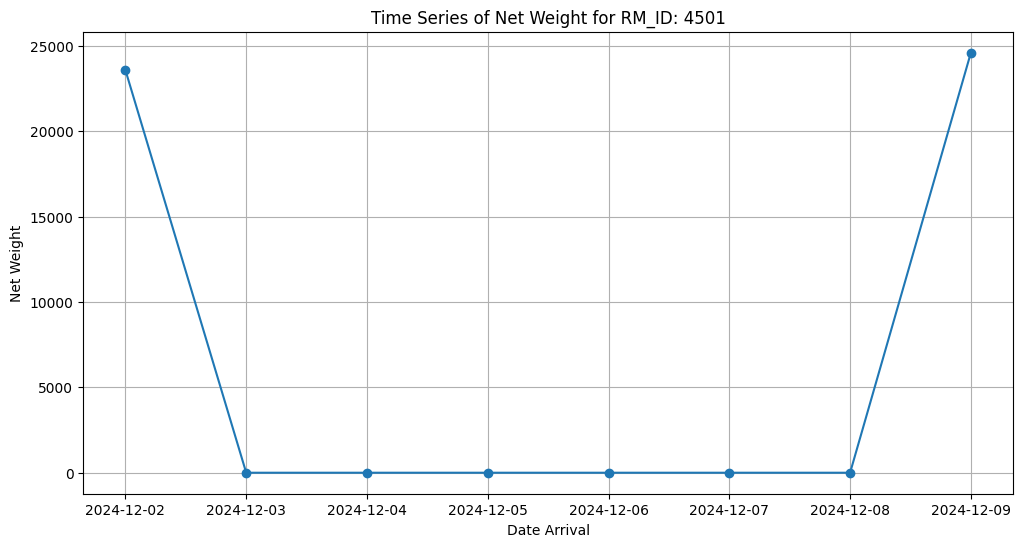

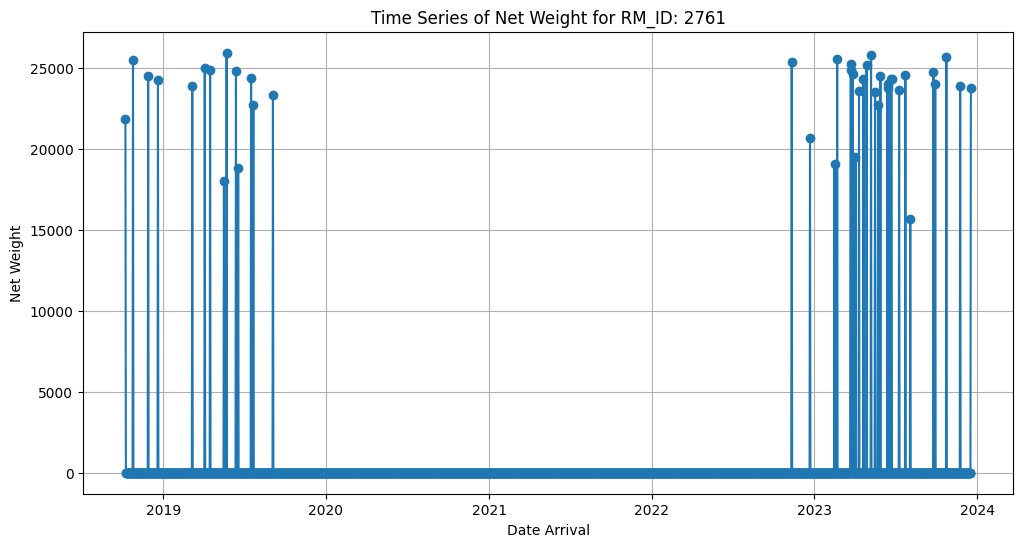

In [26]:
receivals_2021 = receivals[receivals['date_arrival'] >= '2021-01-01']['rm_id'].unique()
receivals_2022 = receivals[receivals['date_arrival'] >= '2022-01-01']['rm_id'].unique()
receivals_2023 = receivals[receivals['date_arrival'] >= '2023-01-01']['rm_id'].unique()
receivals_2024 = receivals[receivals['date_arrival'] >= '2024-01-01']['rm_id'].unique()

print(f"These rm_ids are in 2023 but not in 2024: {set(receivals_2023) - set(receivals_2024)}")
print(f"These rm_ids are in 2024 but not in 2023: {set(receivals_2024) - set(receivals_2023)}")
print(f"These rm_ids are in 2022 but not in 2023: {set(receivals_2022) - set(receivals_2023)}")
print(f"These rm_ids are in 2023 but not in 2022: {set(receivals_2023) - set(receivals_2022)}")
print(f"These rm_ids are in 2021 but not in 2022: {set(receivals_2021) - set(receivals_2022)}")
print(f"These rm_ids are in 2022 but not in 2021: {set(receivals_2022) - set(receivals_2021)}")

plot_rm_id_time_series(4501)
plot_rm_id_time_series(2761)

In [31]:
deprecated = set(receivals_2021) - set(receivals_2024)


# CUMULATIVE PLOTTING
def plot_rm_id_time_series(rm_id):
    df = receivals[receivals['rm_id'] == rm_id].copy()
    df = df.set_index('date_arrival').resample('D').sum().reset_index()
    
    # Extract year
    df["year"] = df["date_arrival"].dt.year
    
    # Compute cumulative net_weight per year
    df["cumulative_net_weight"] = df.groupby("year")["net_weight"].cumsum()
    
    # Plot
    plt.figure(figsize=(12, 6))
    for y, yearly_df in df.groupby("year"):
        plt.plot(yearly_df['date_arrival'], yearly_df['cumulative_net_weight'], marker='o', label=str(y))
    
    plt.title(f'Cumulative Time Series of Net Weight for RM_ID: {rm_id}')
    plt.xlabel('Date Arrival')
    plt.ylabel('Cumulative Net Weight')
    plt.legend()
    plt.grid(True)
    plt.show()

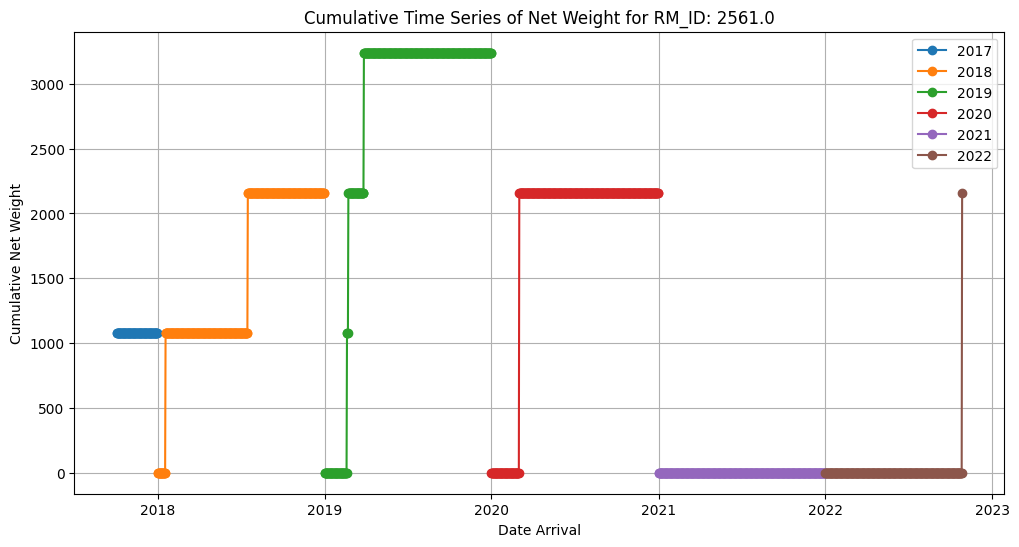

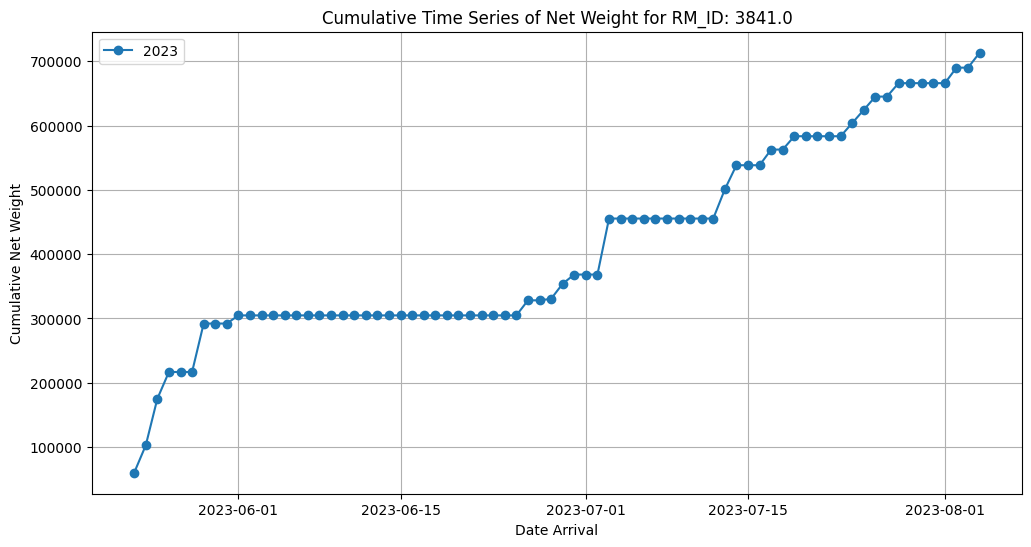

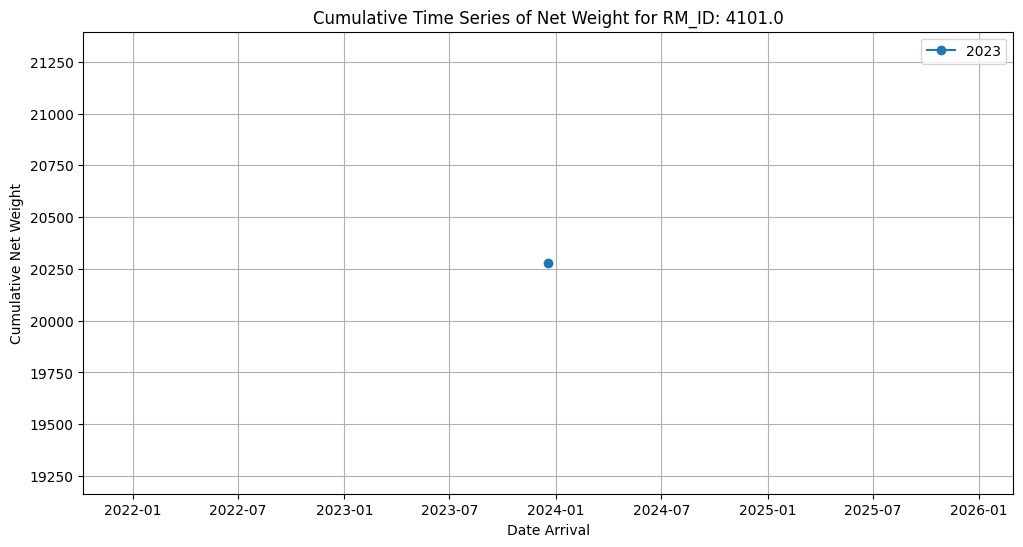

C:\Users\david\AppData\Local\Temp\ipykernel_11516\965899738.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


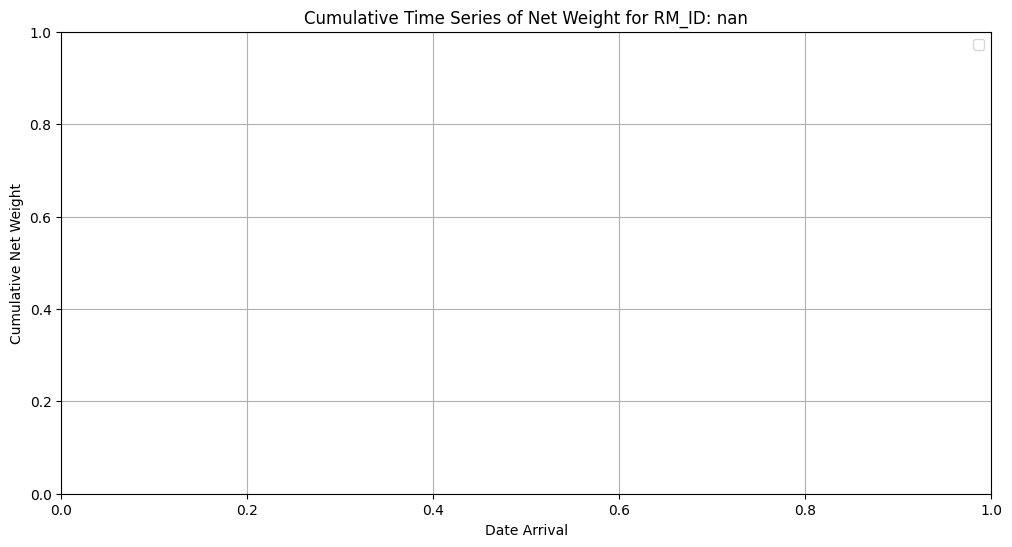

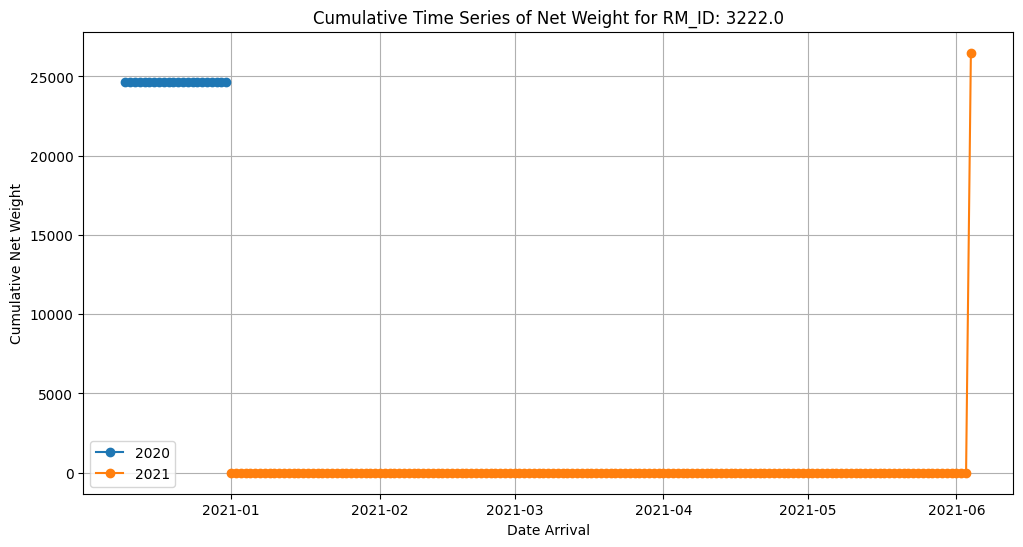

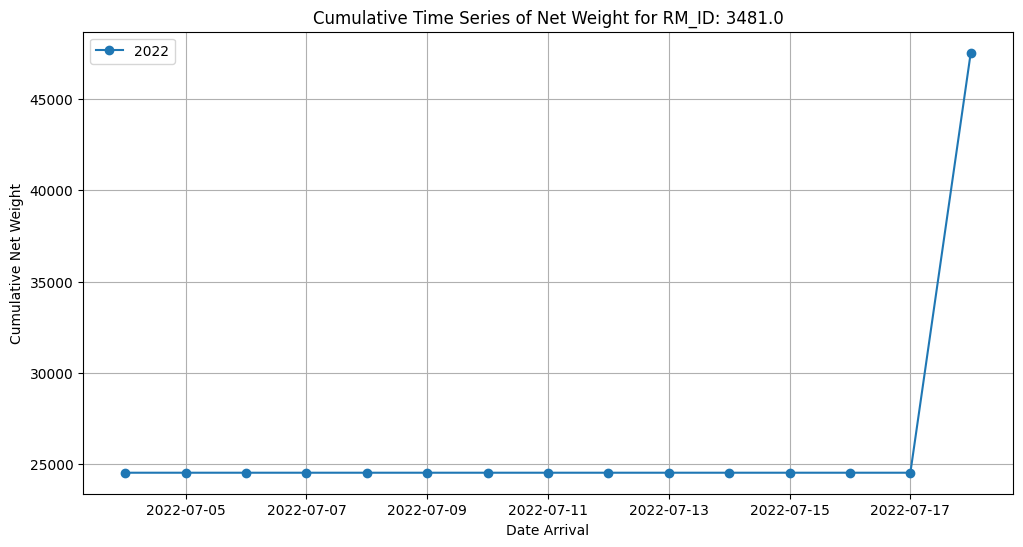

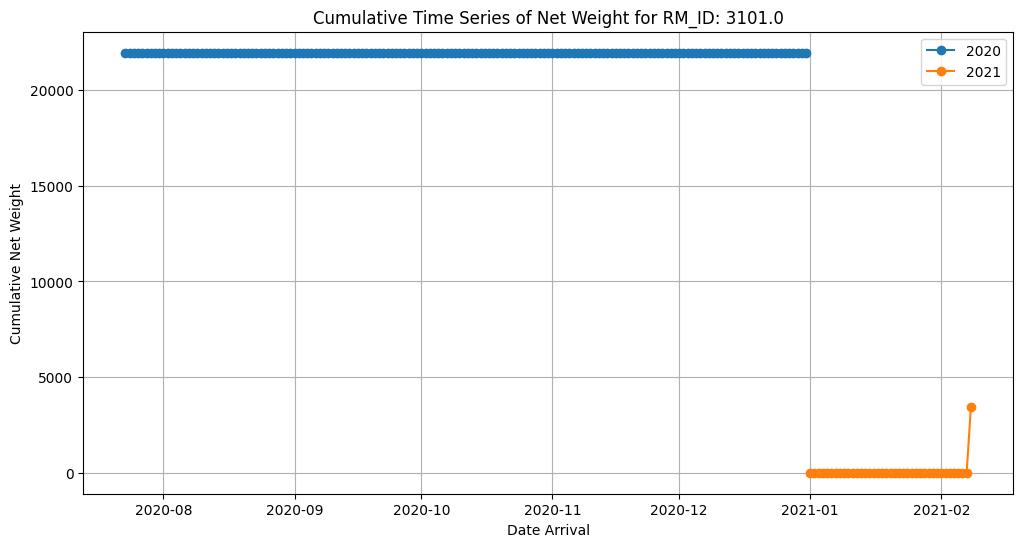

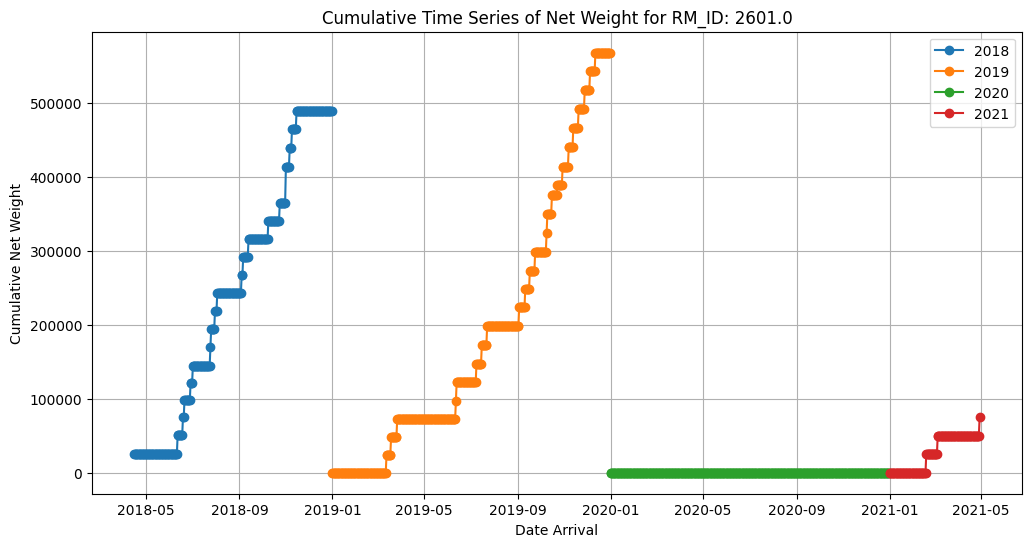

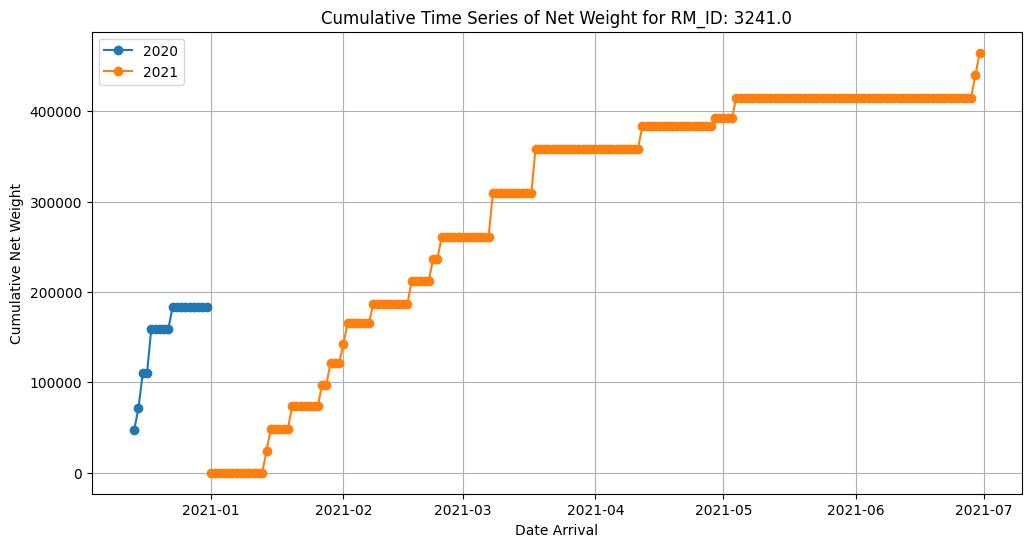

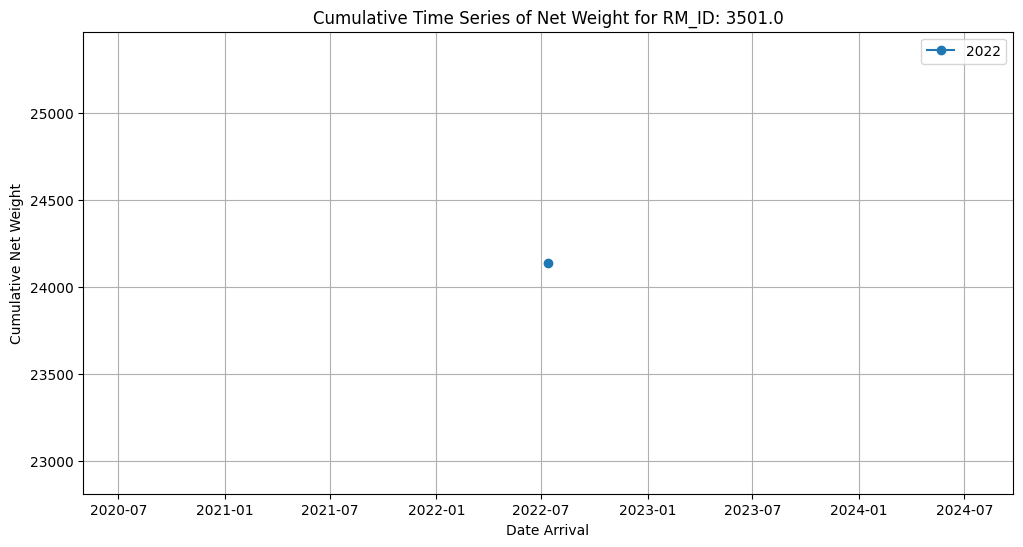

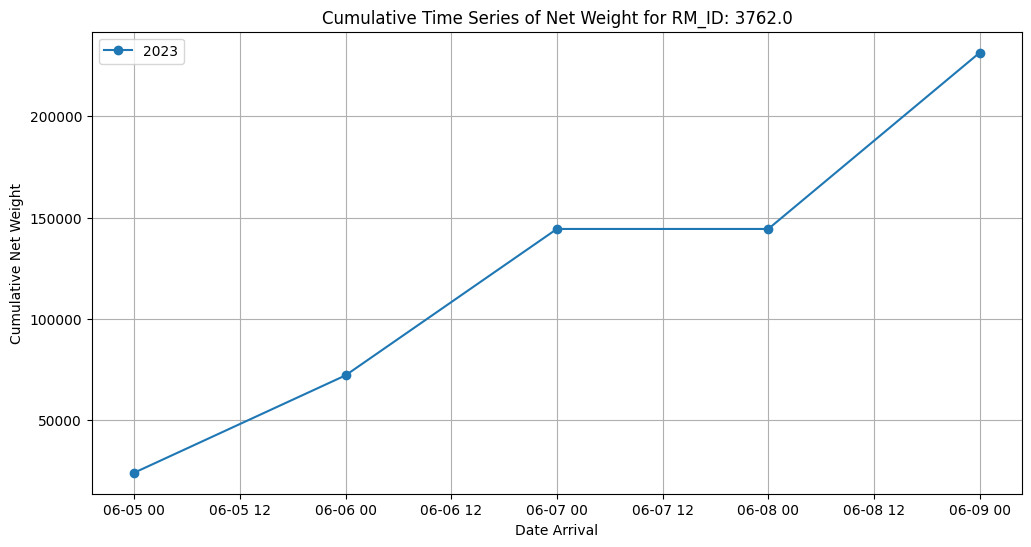

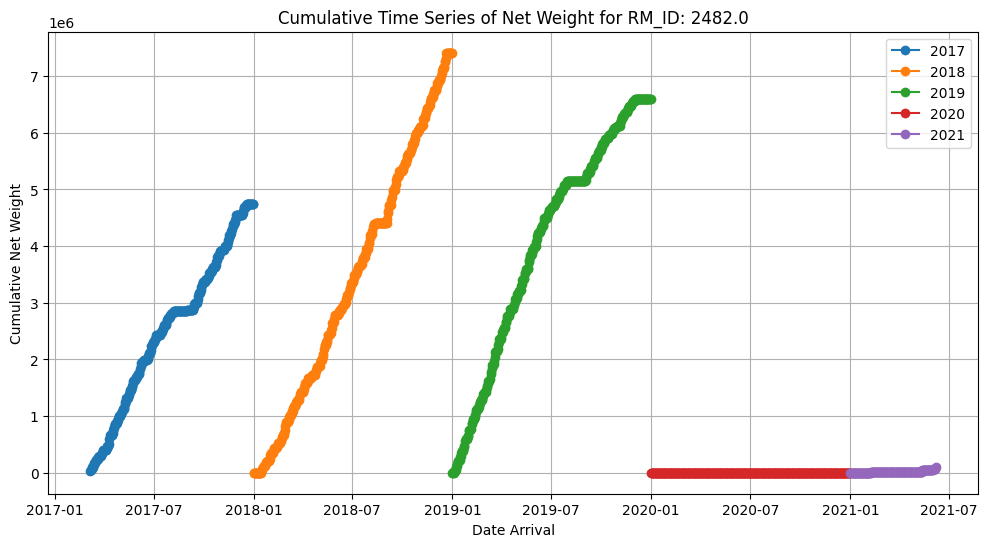

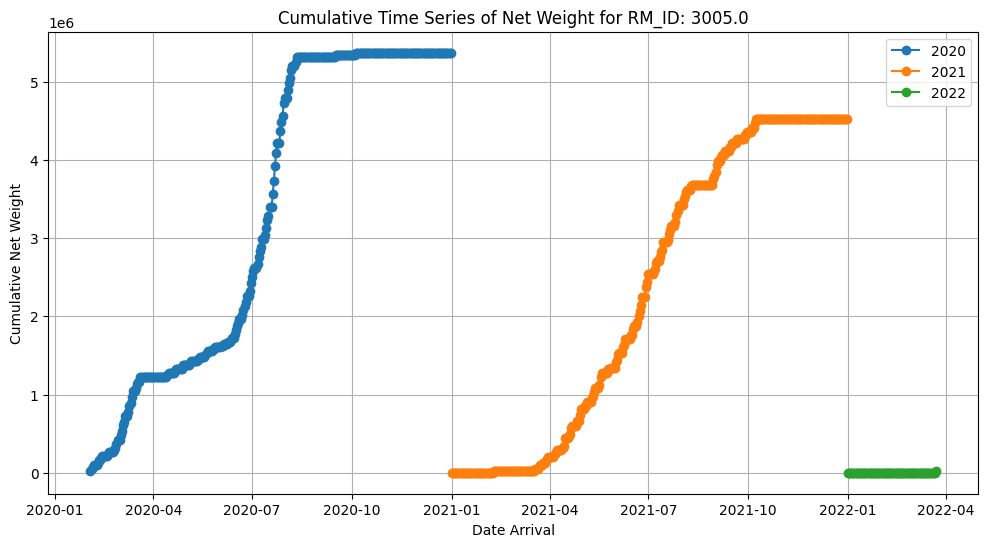

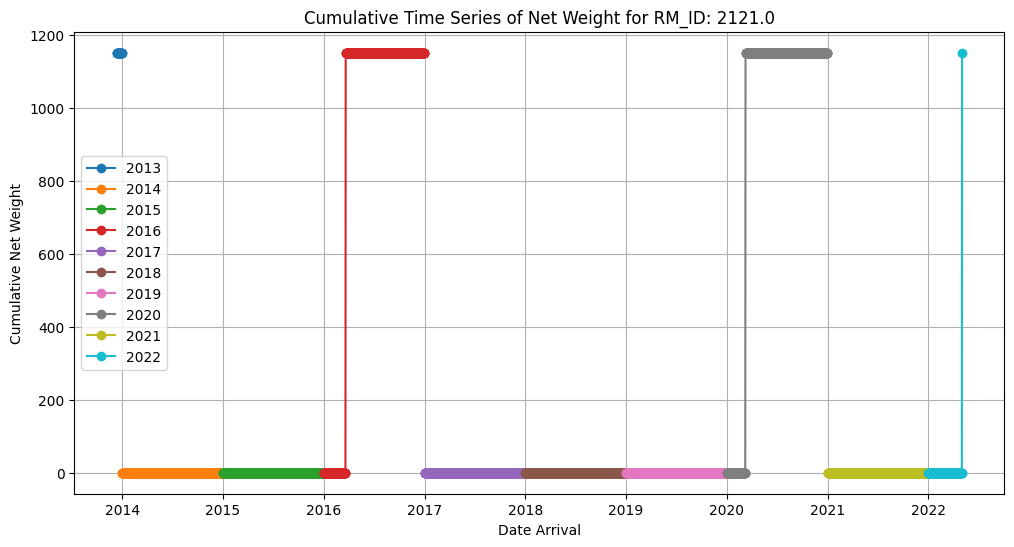

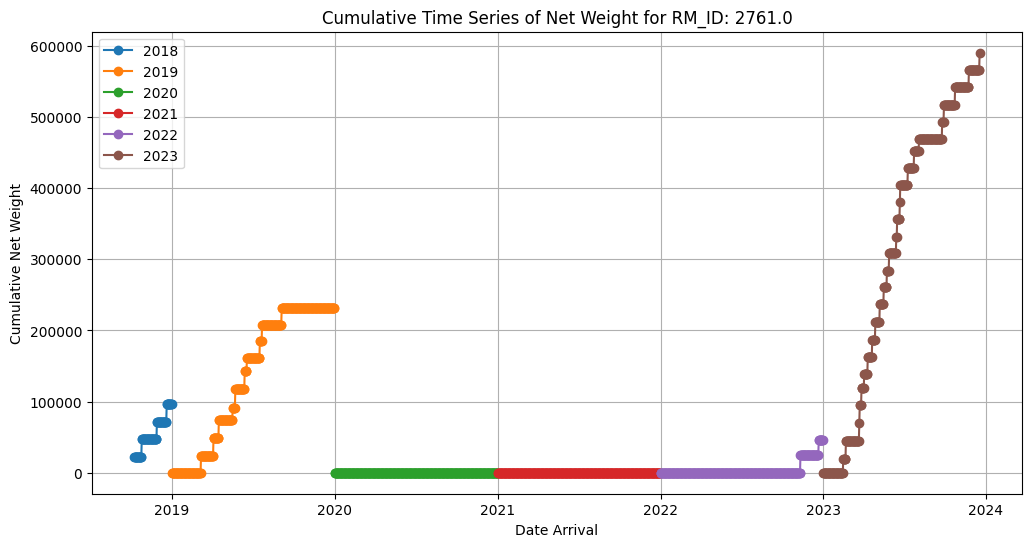

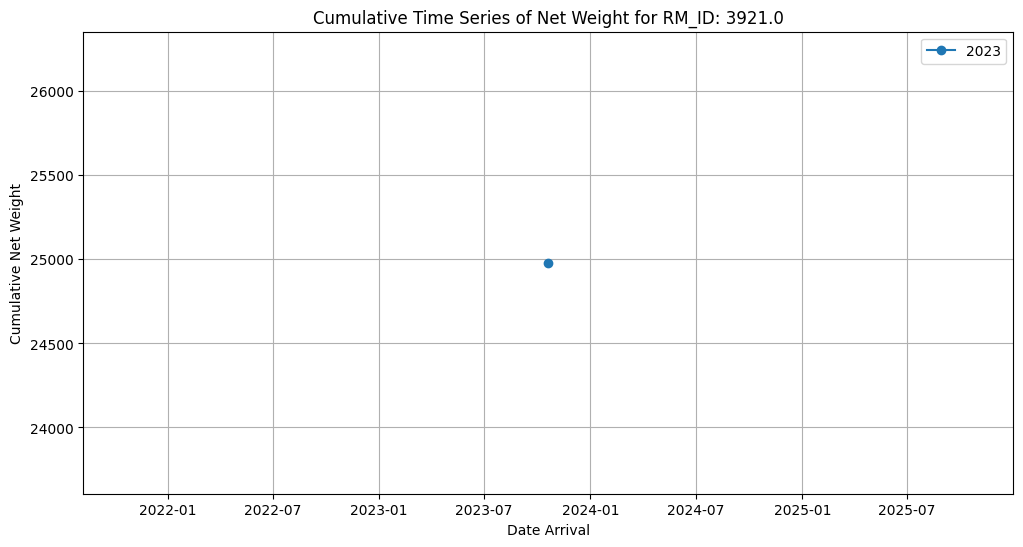

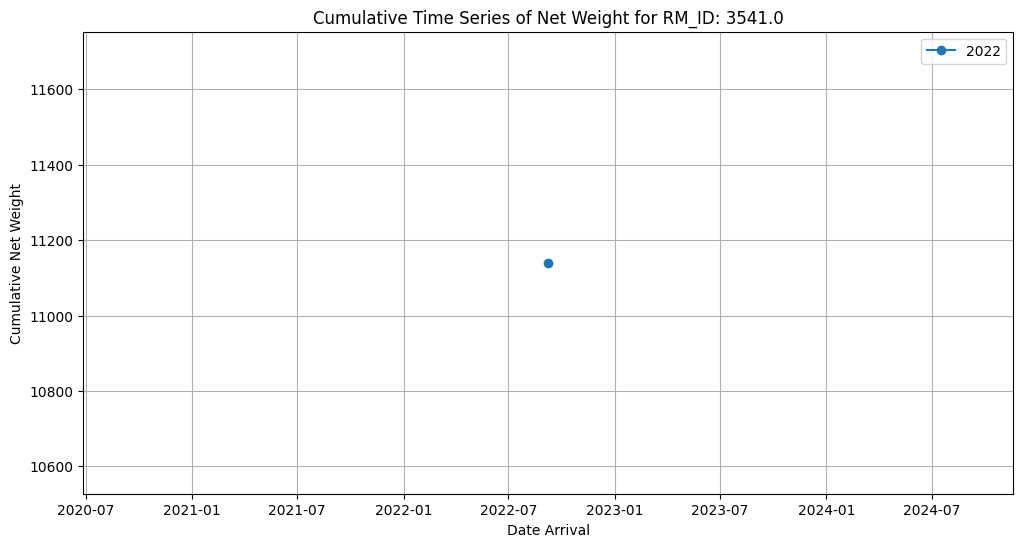

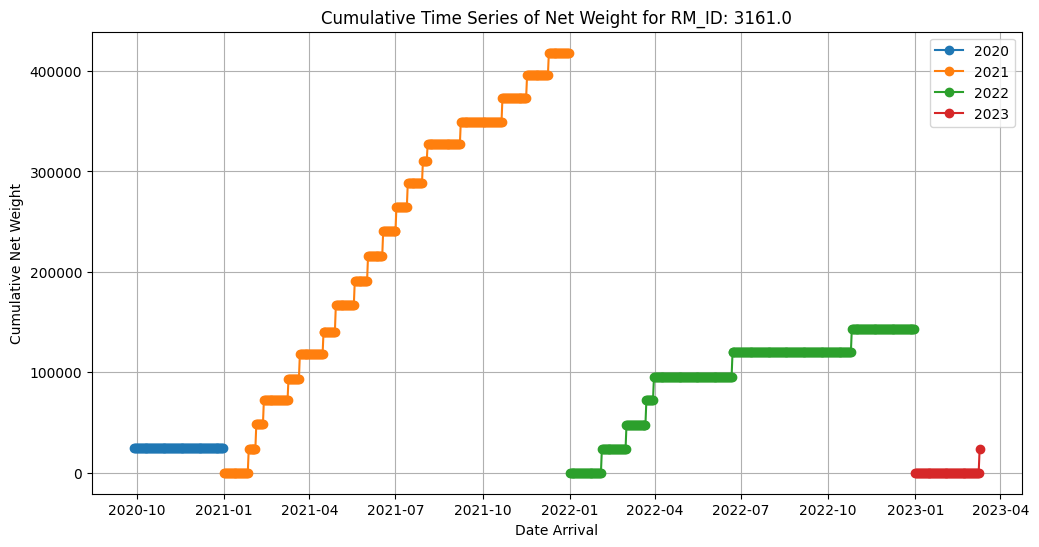

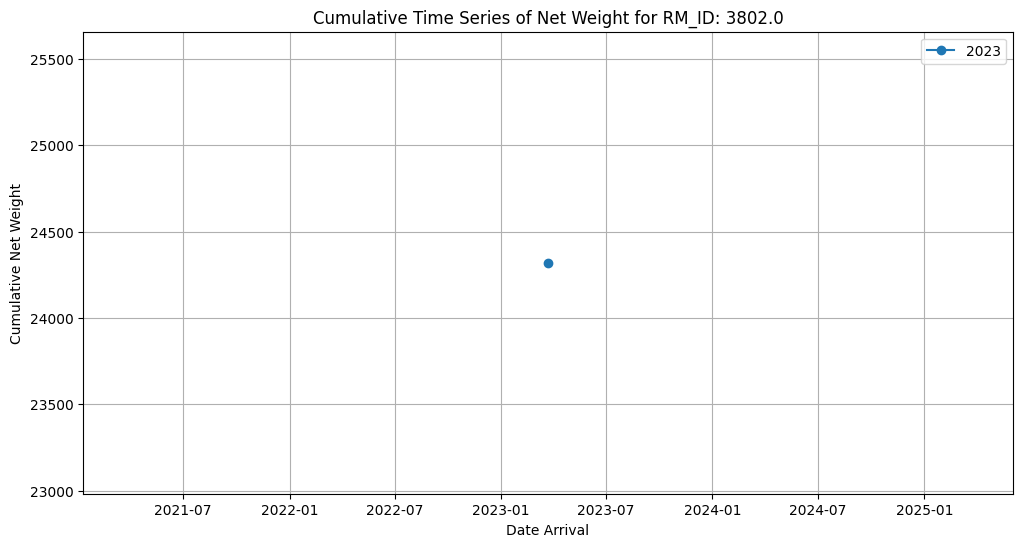

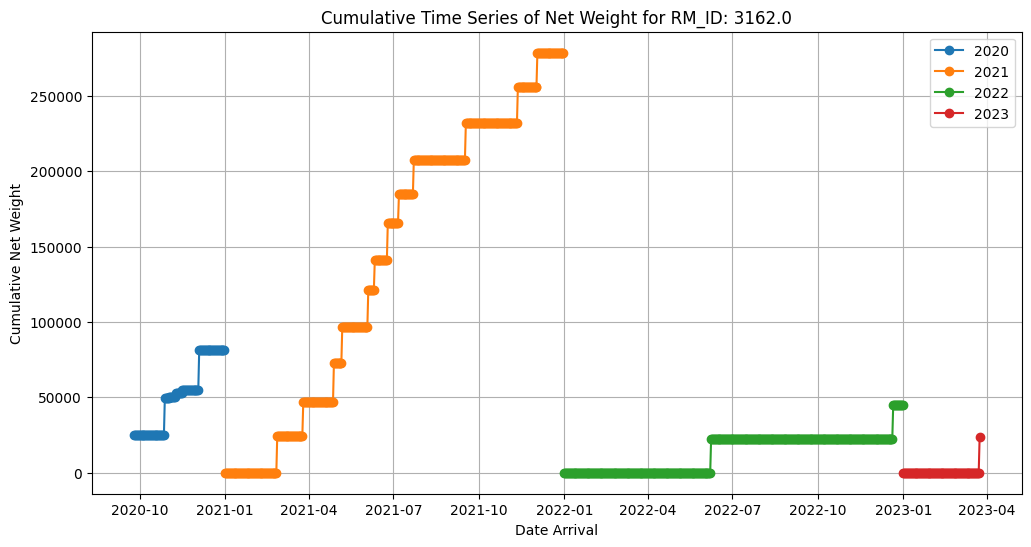

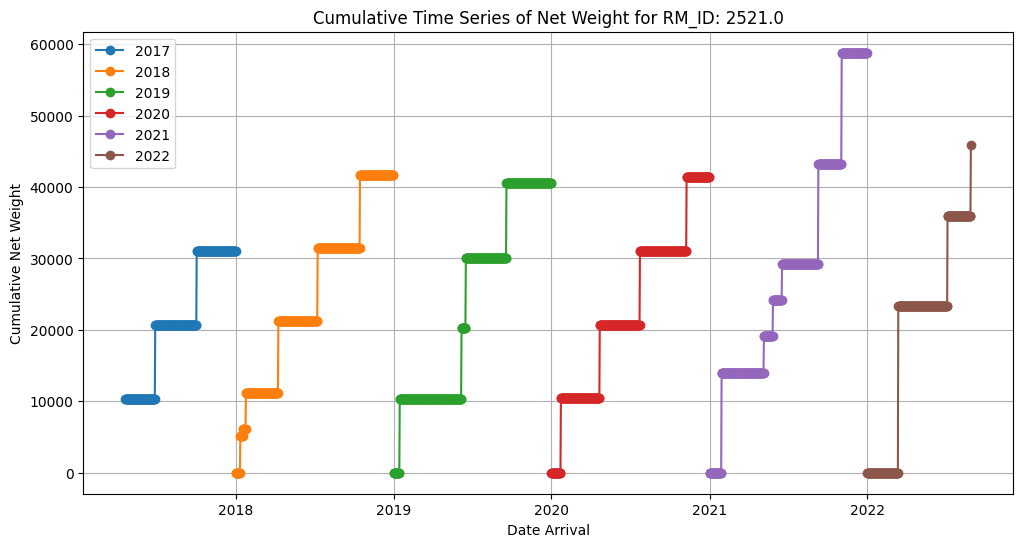

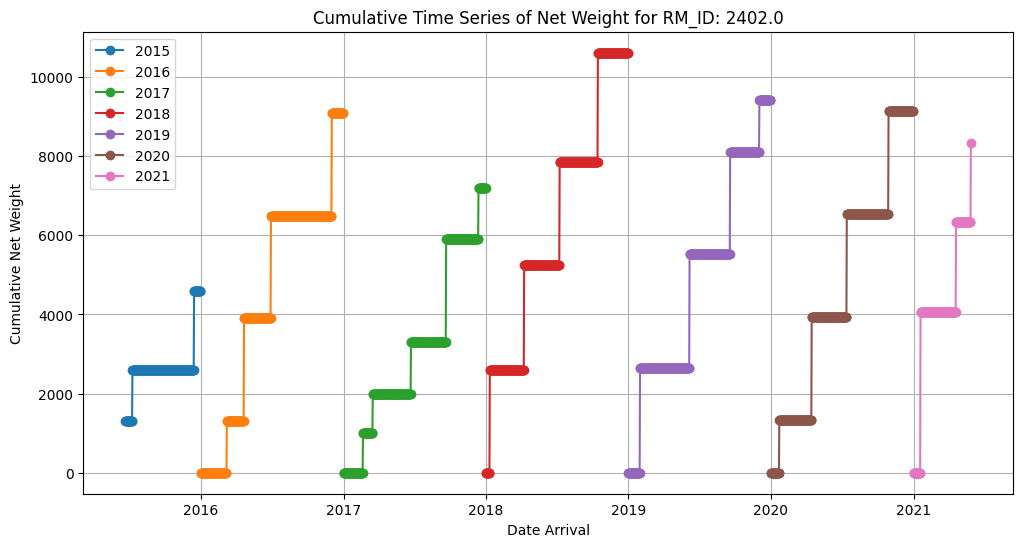

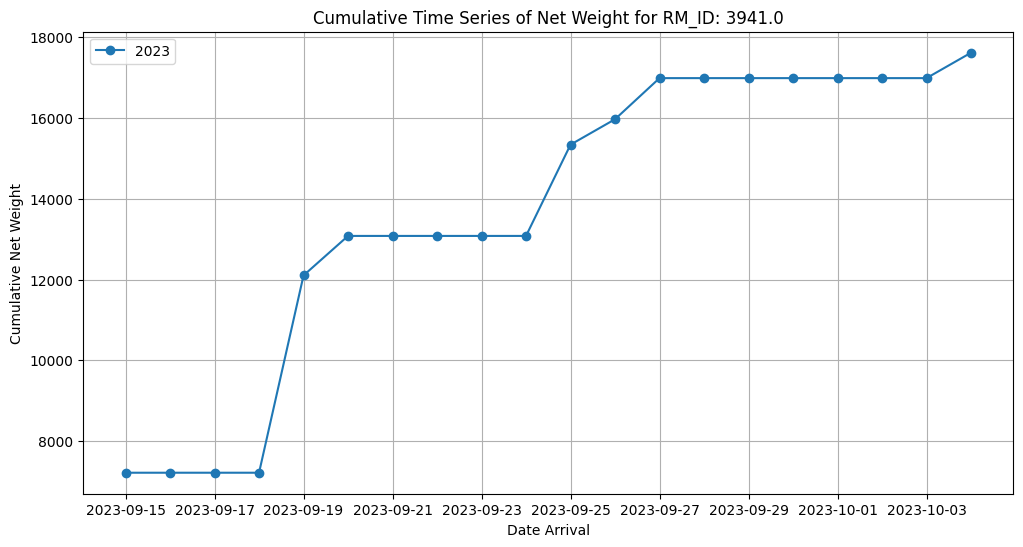

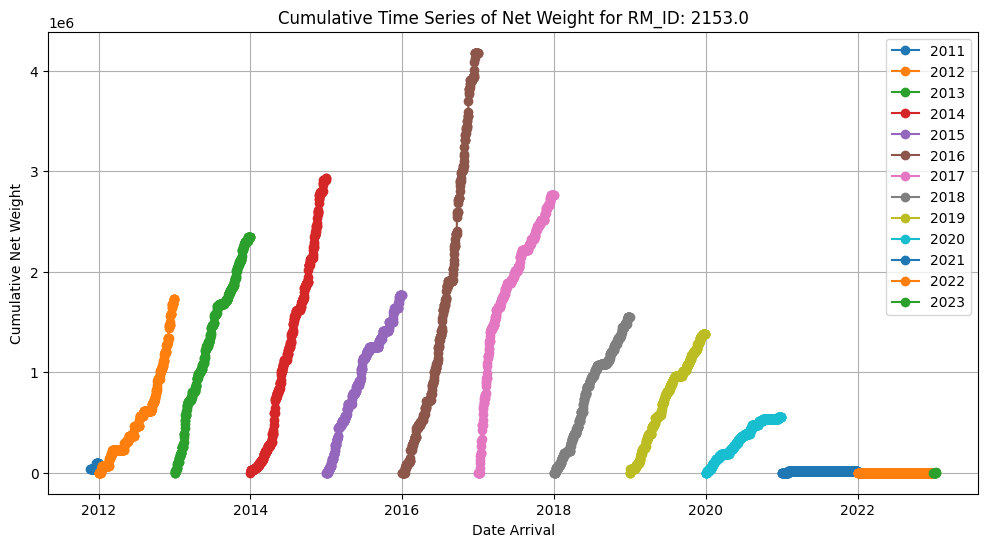

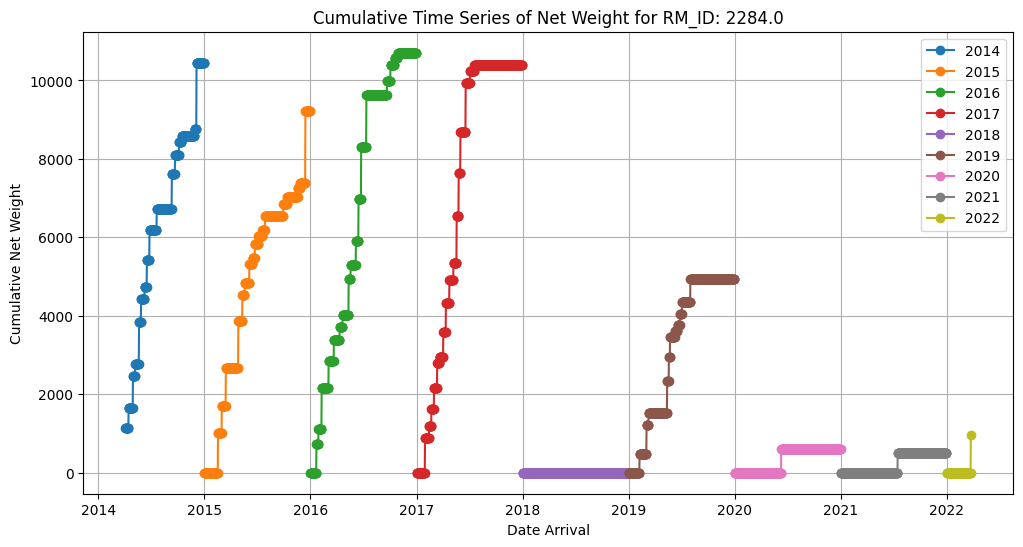

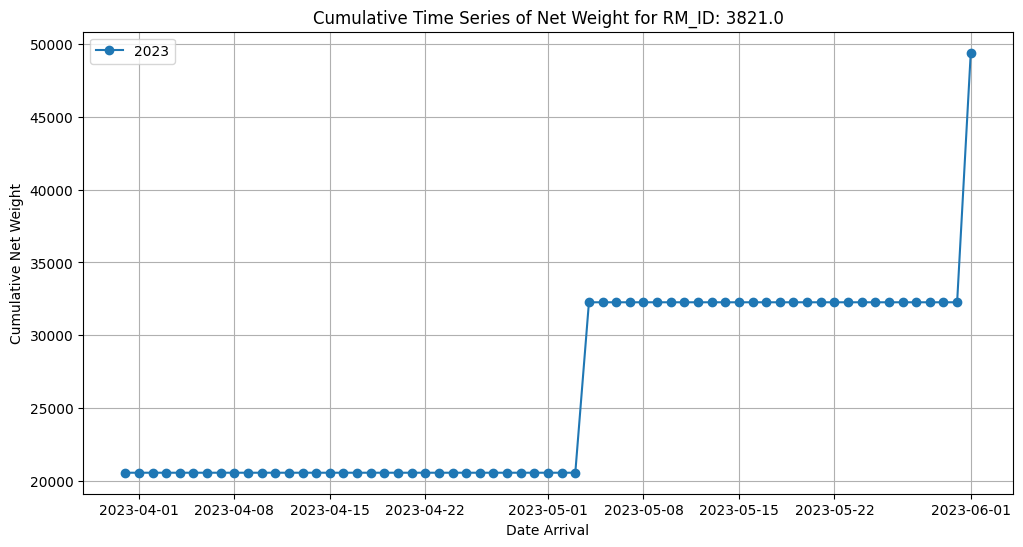

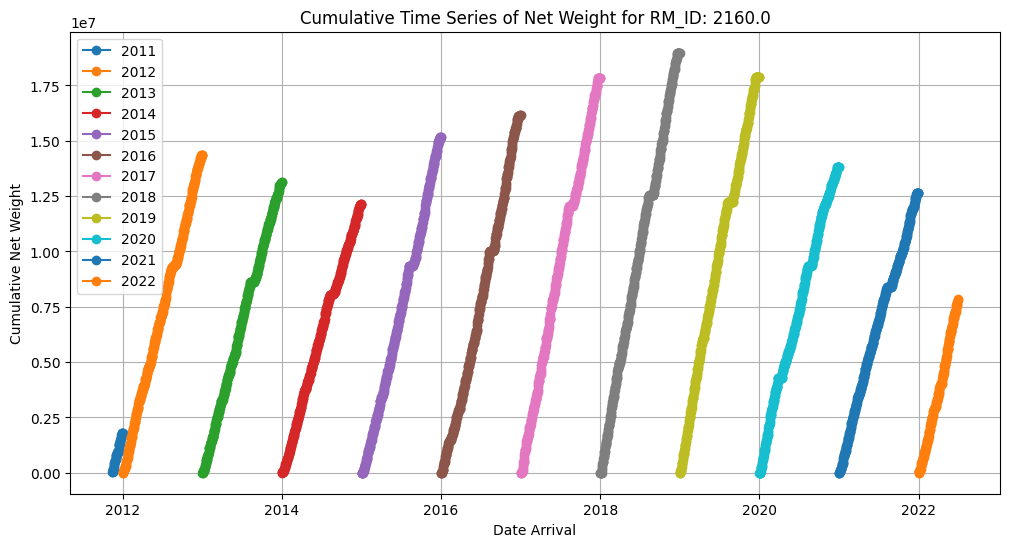

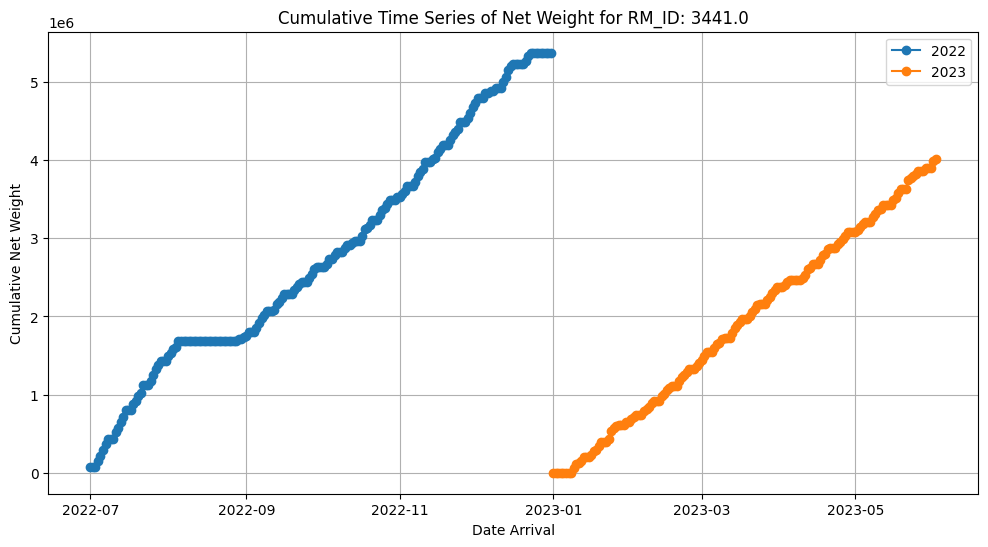

In [32]:
for rm_id in deprecated:
    plot_rm_id_time_series(rm_id)

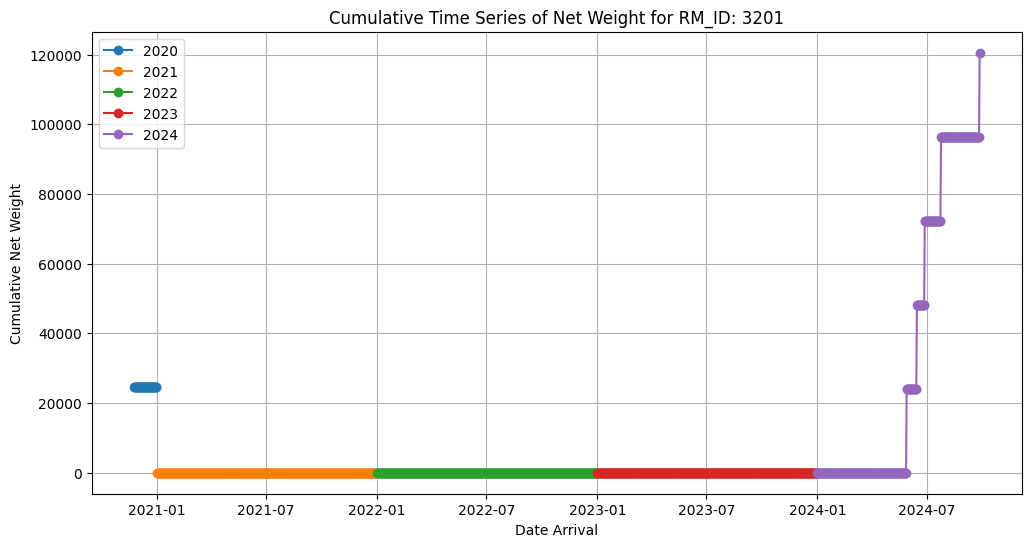

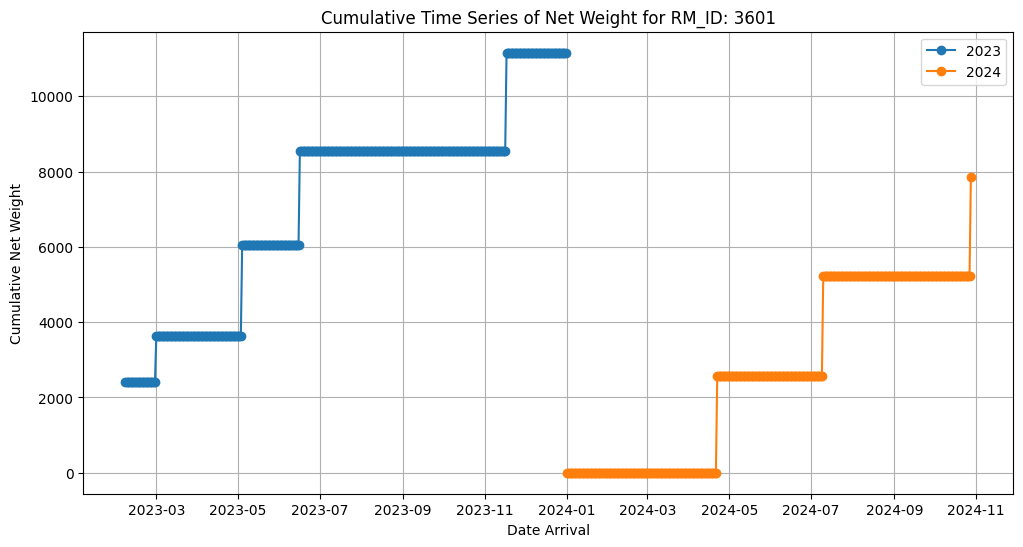

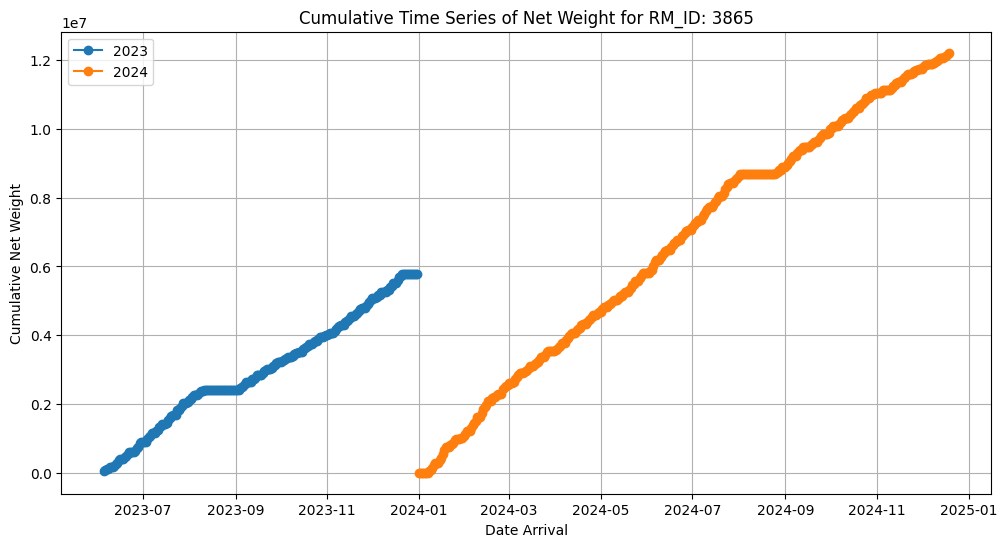

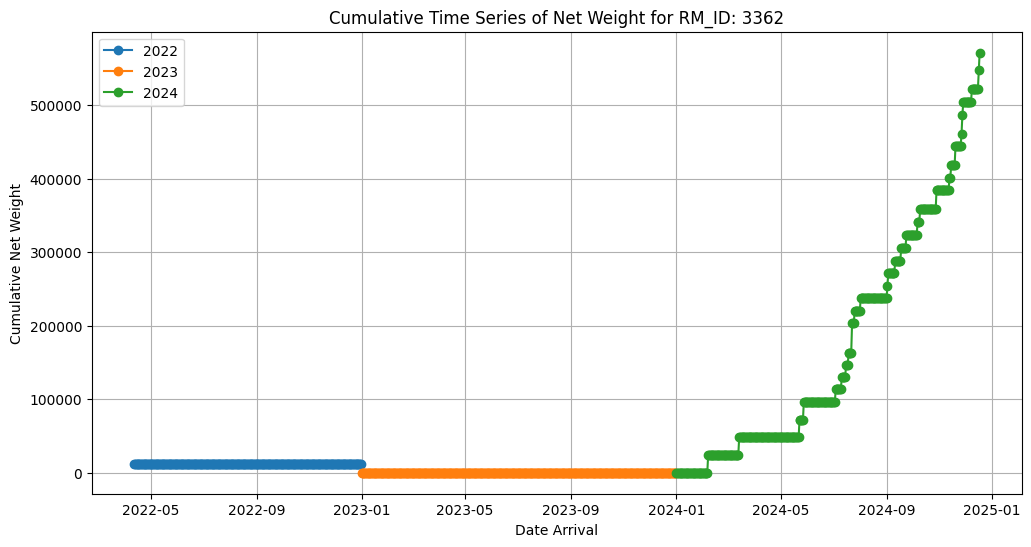

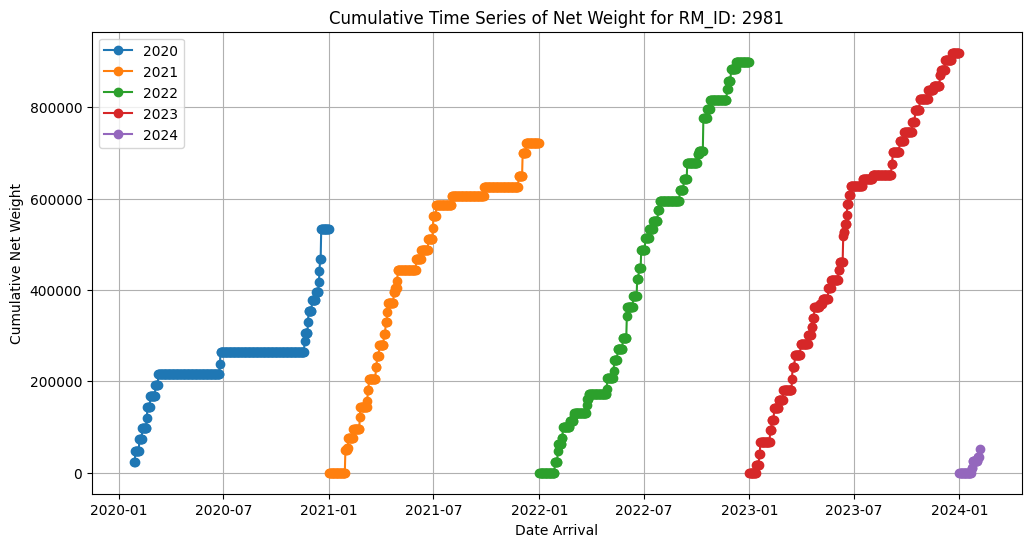

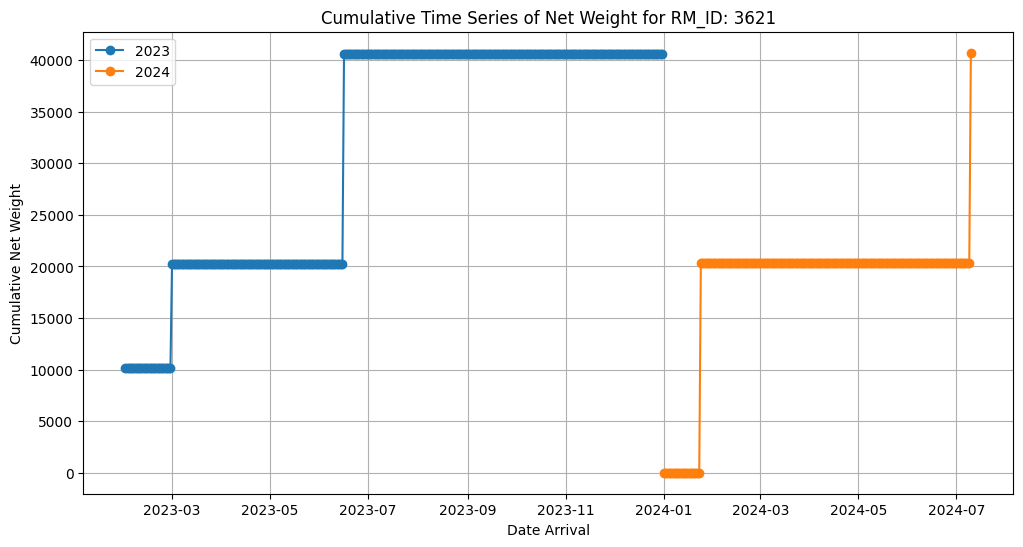

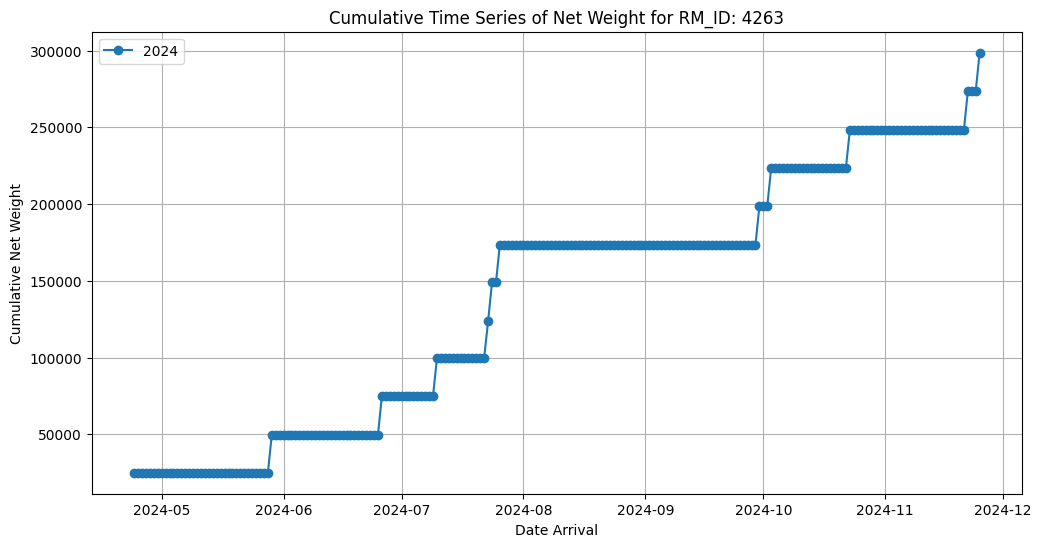

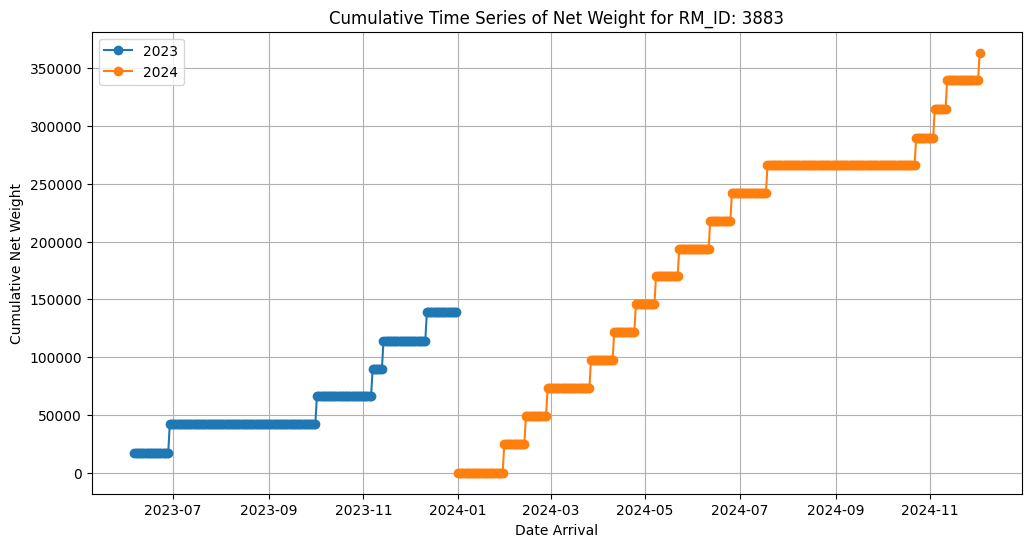

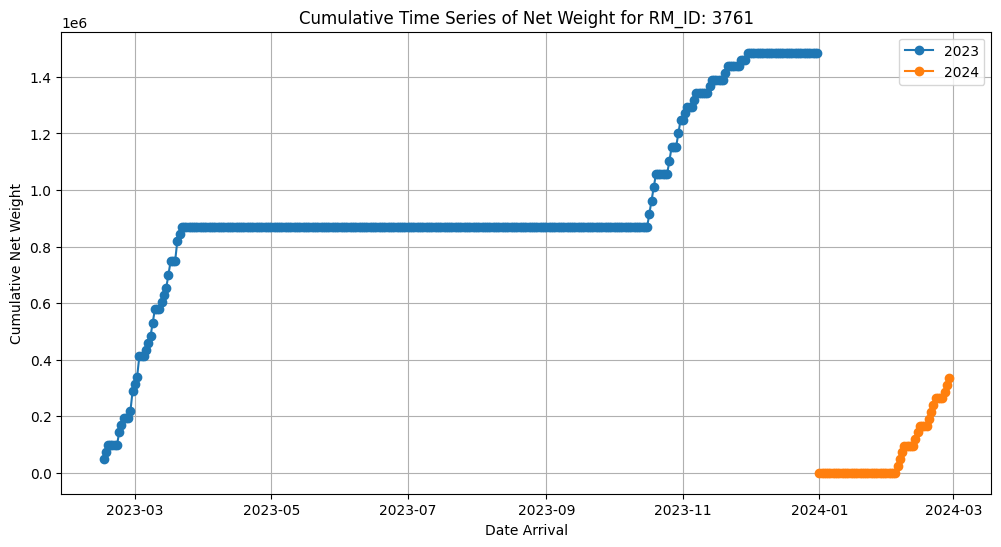

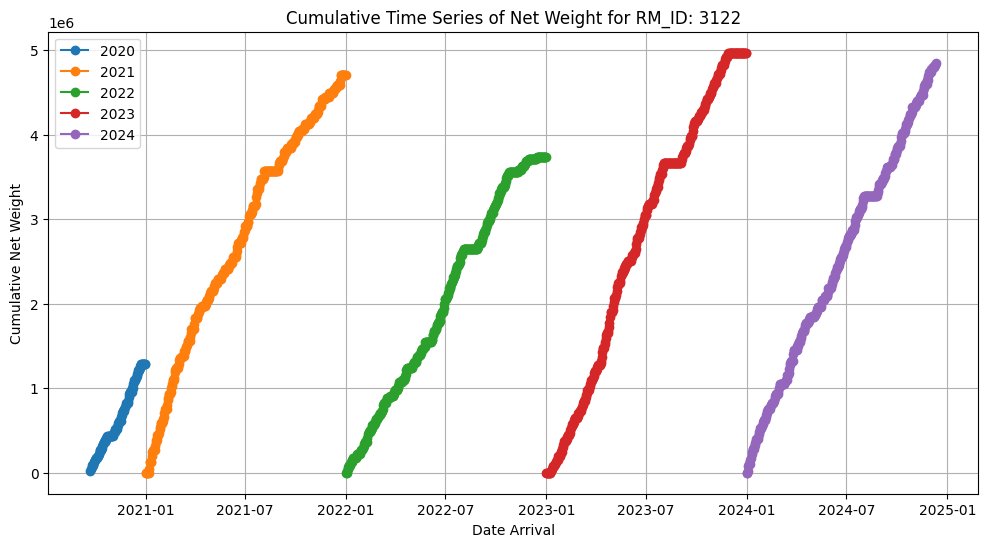

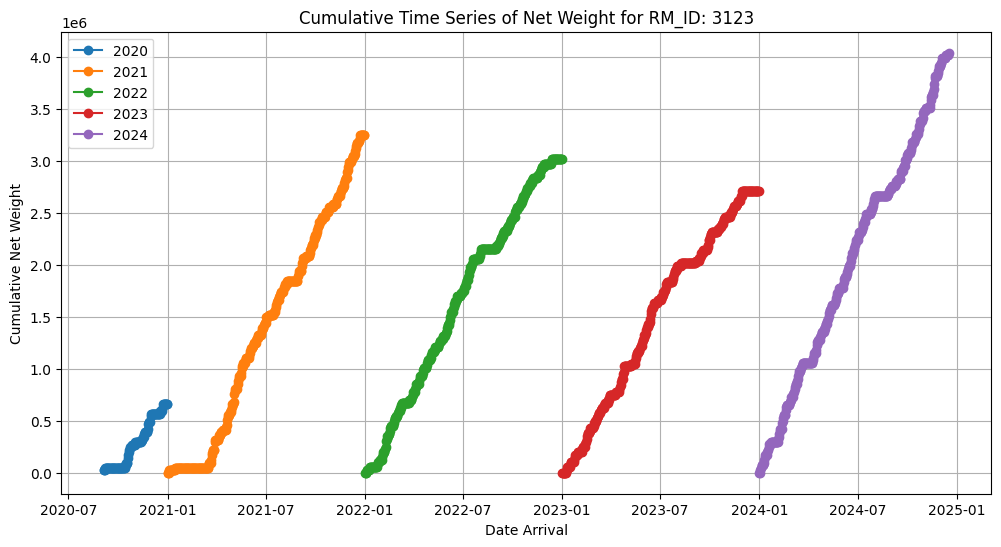

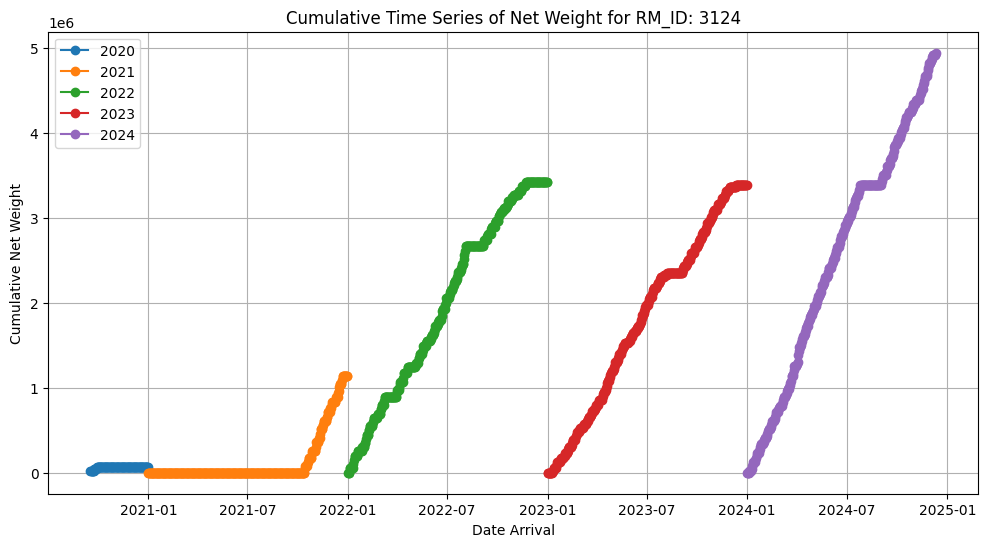

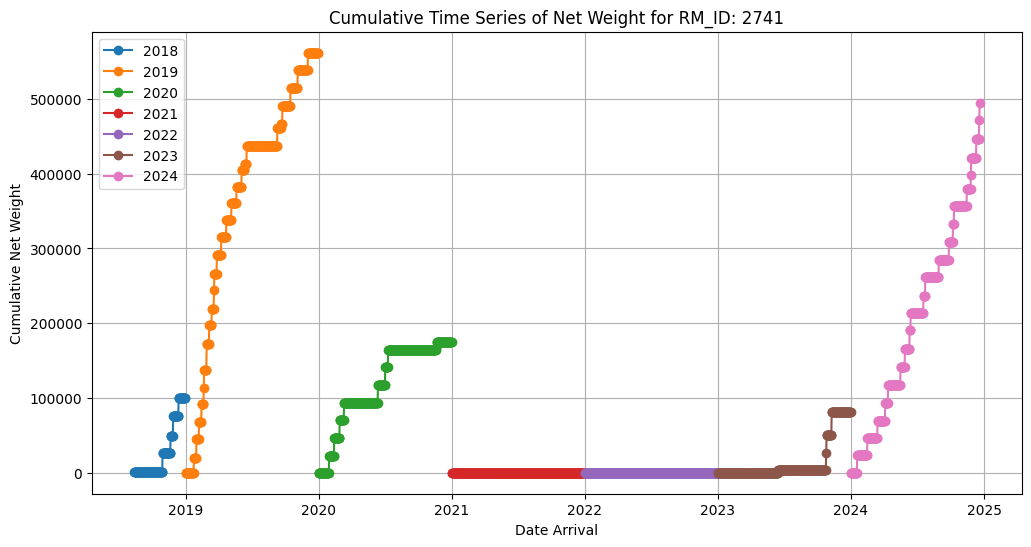

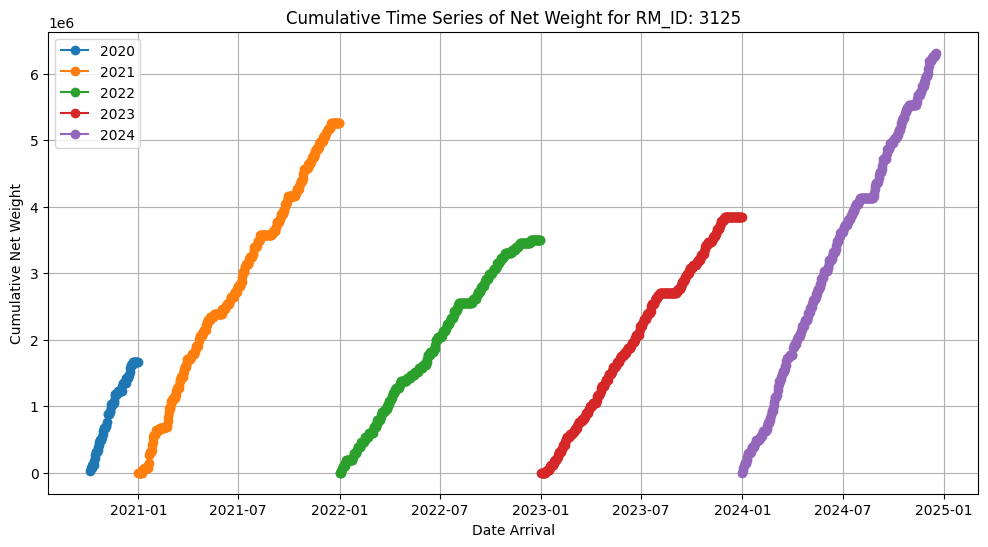

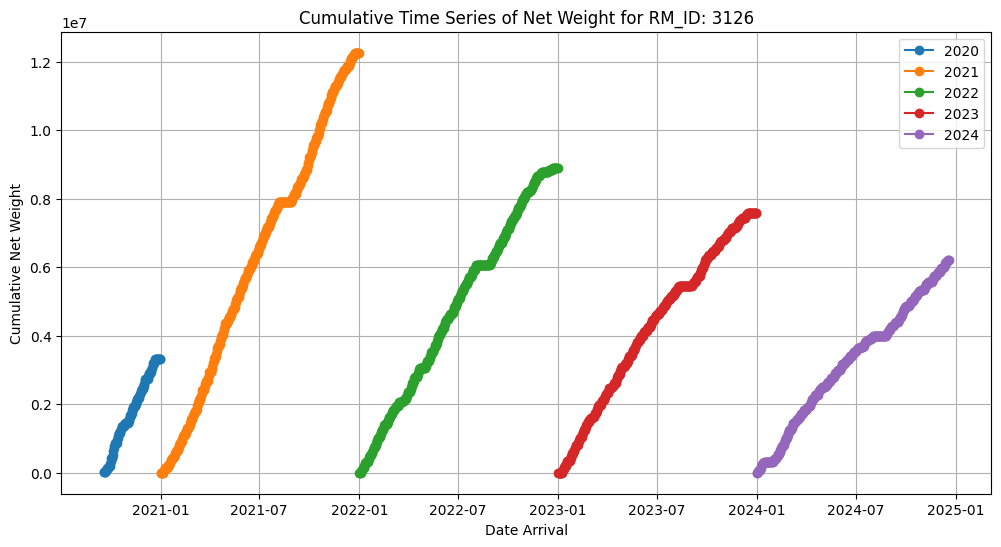

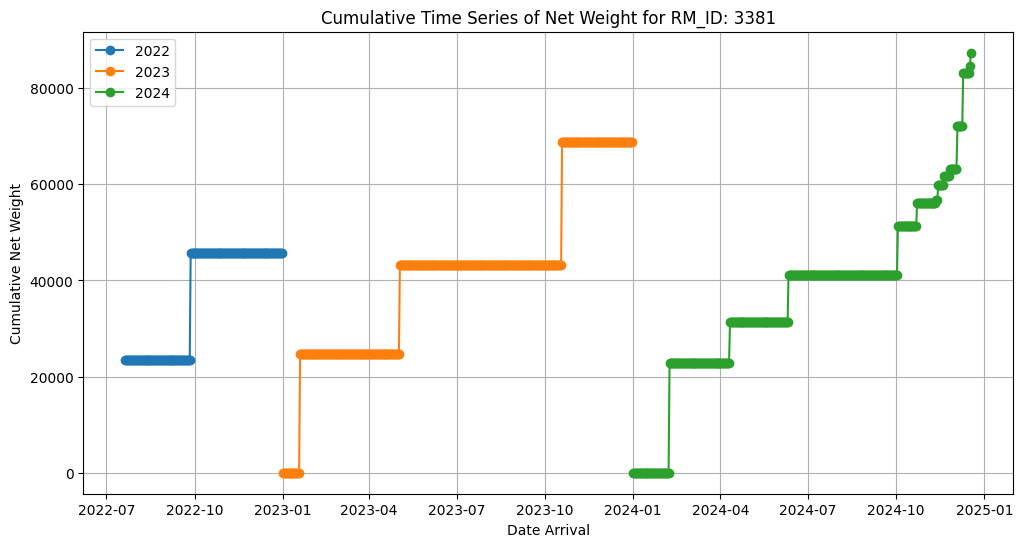

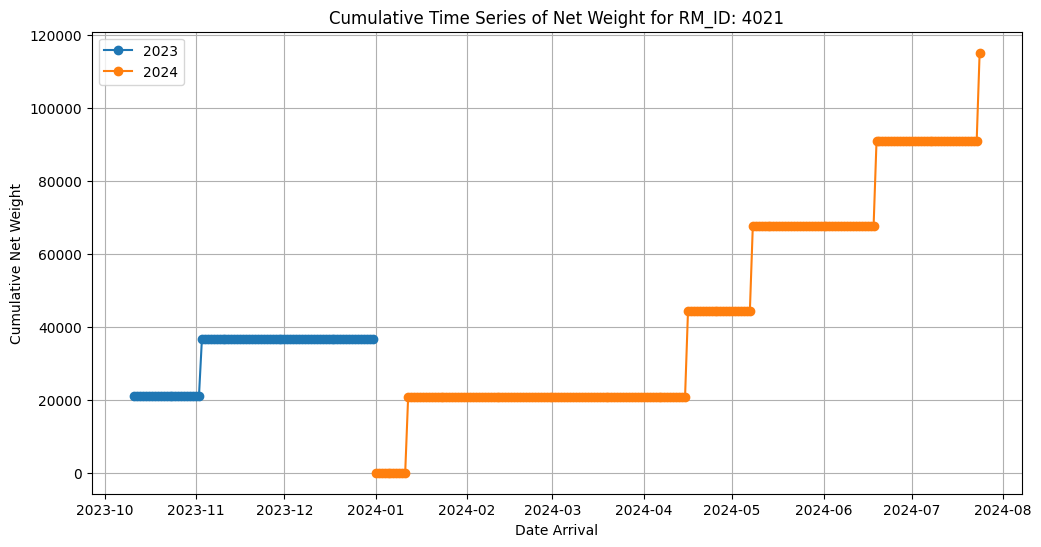

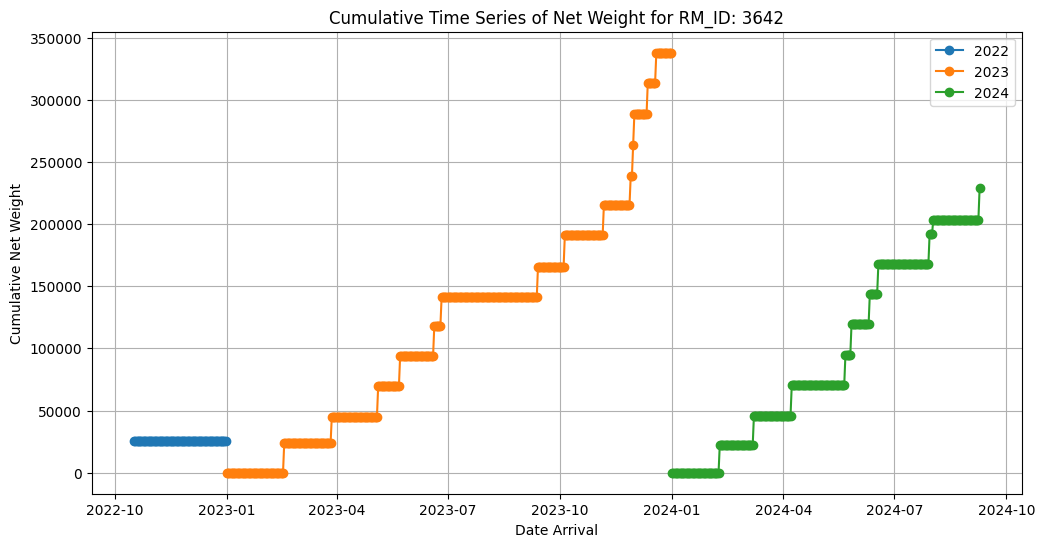

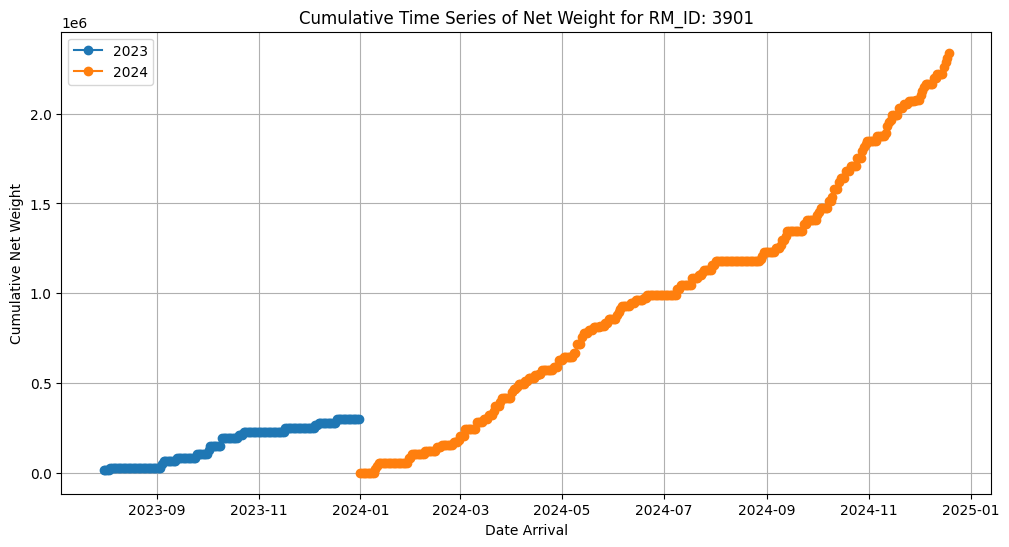

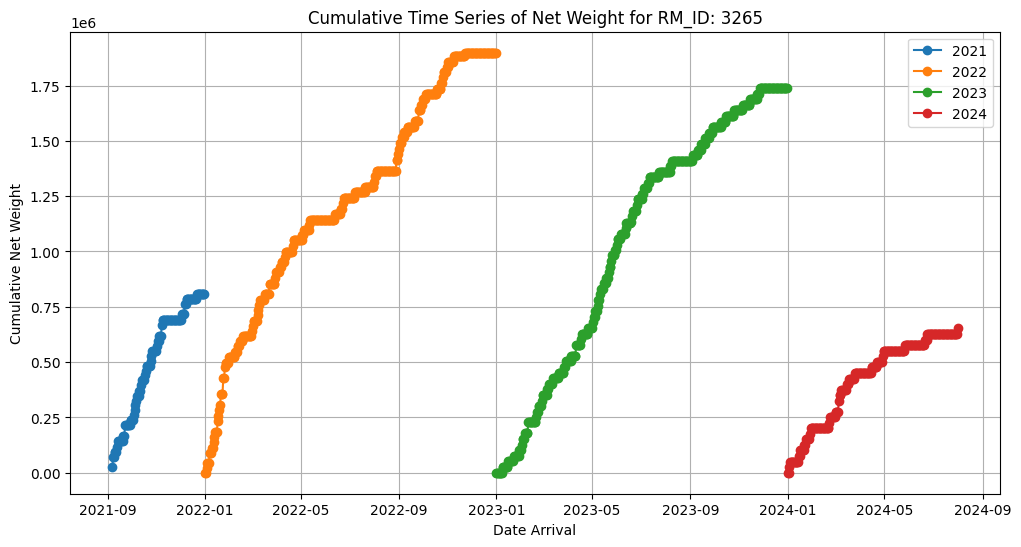

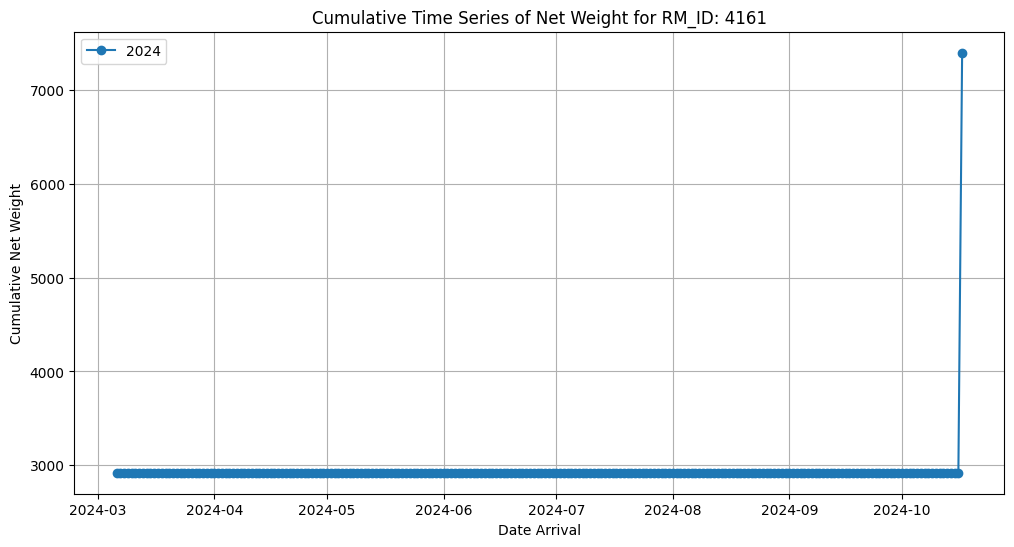

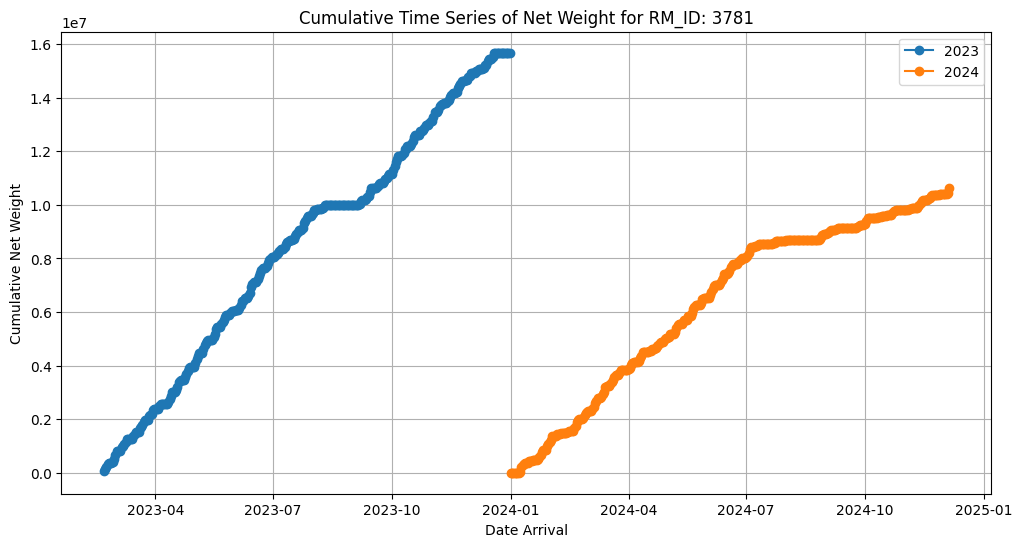

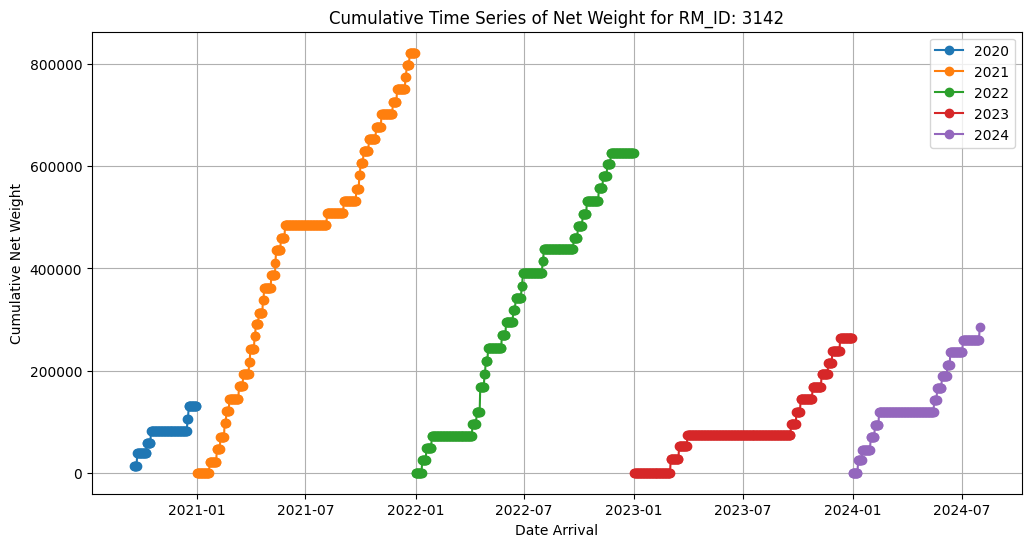

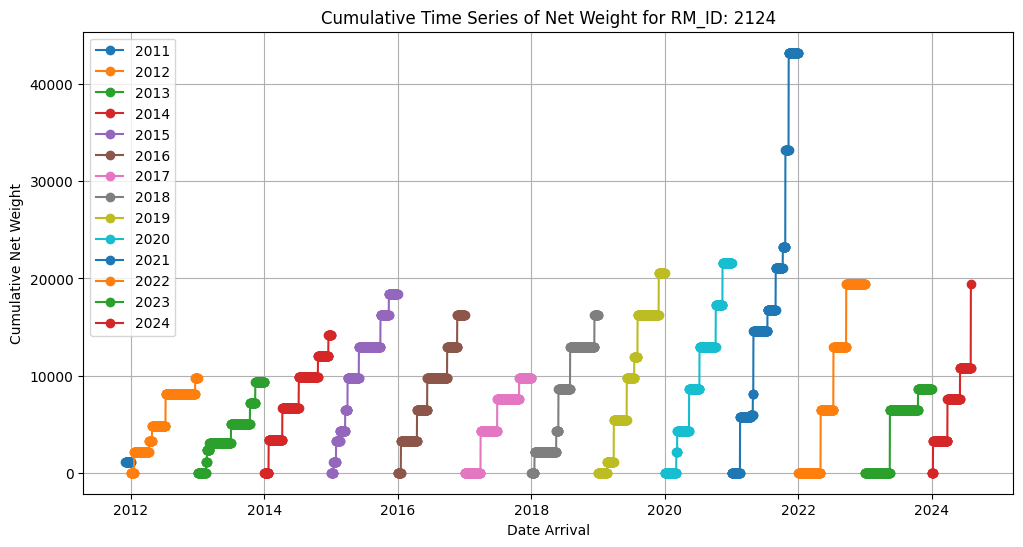

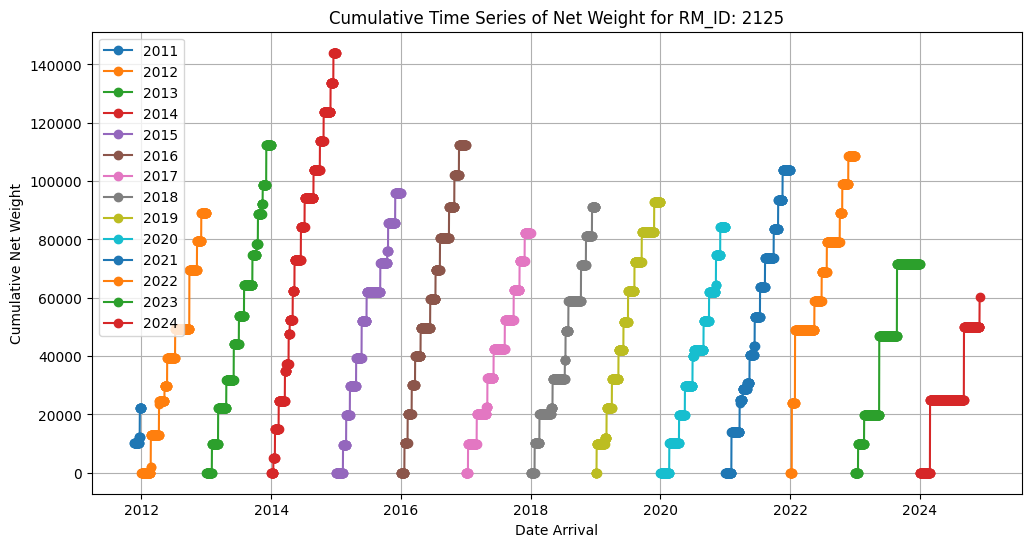

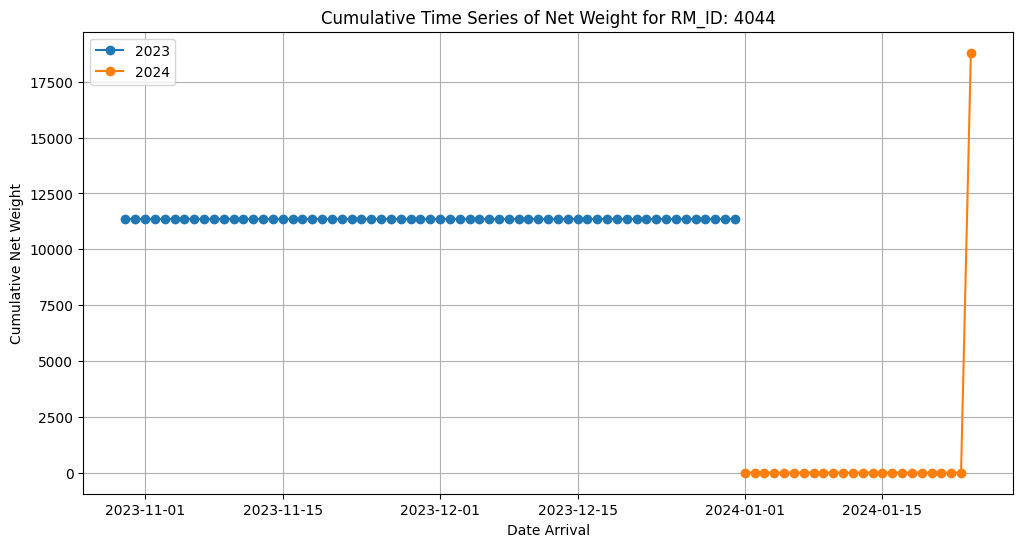

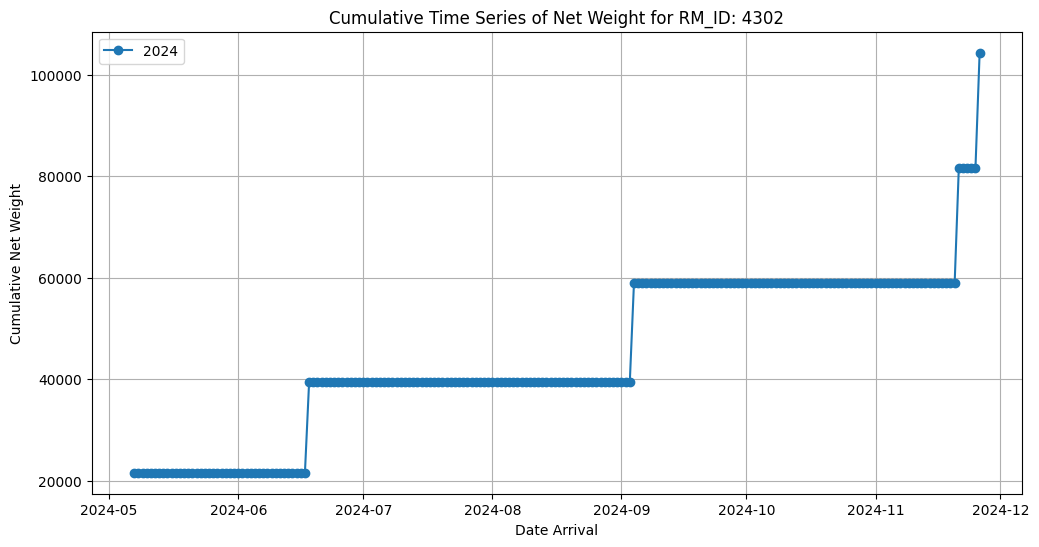

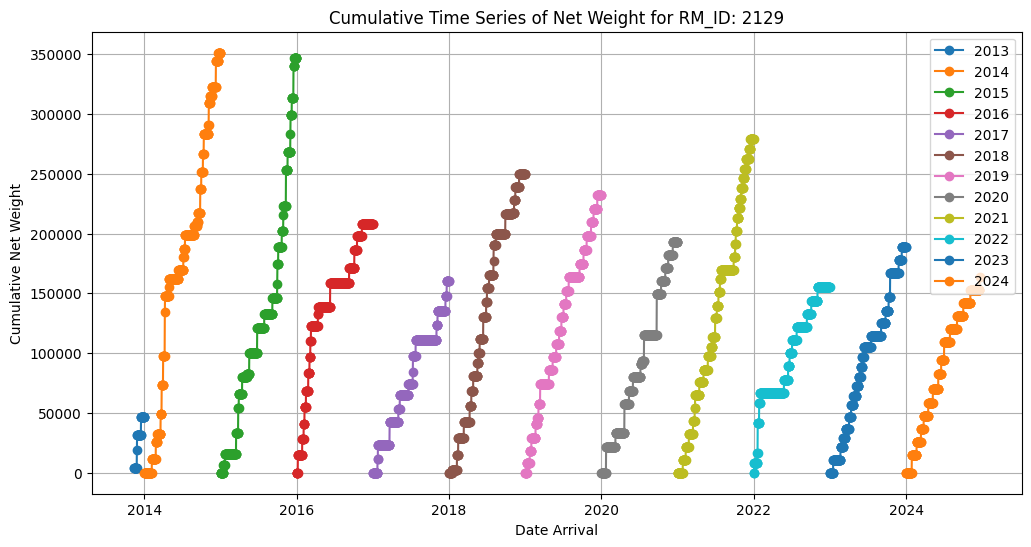

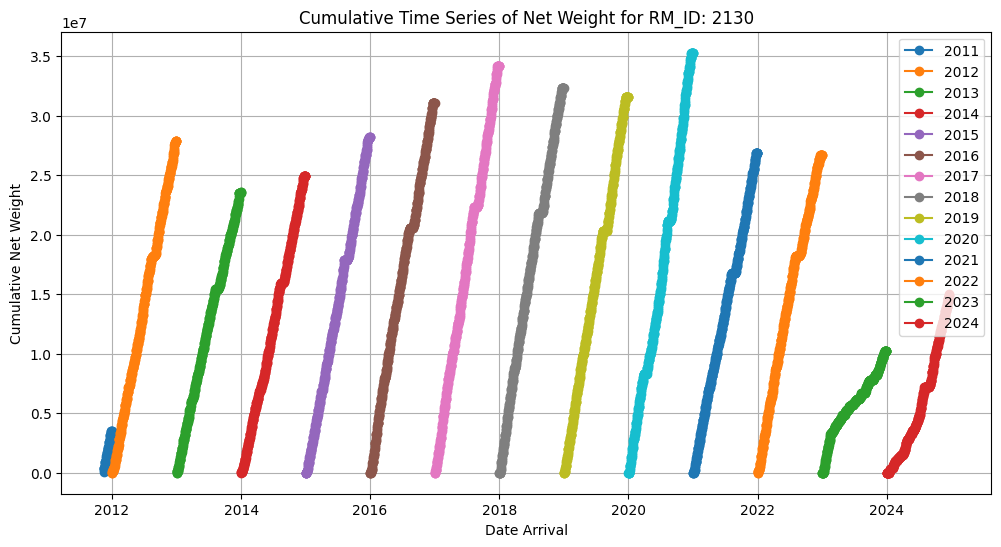

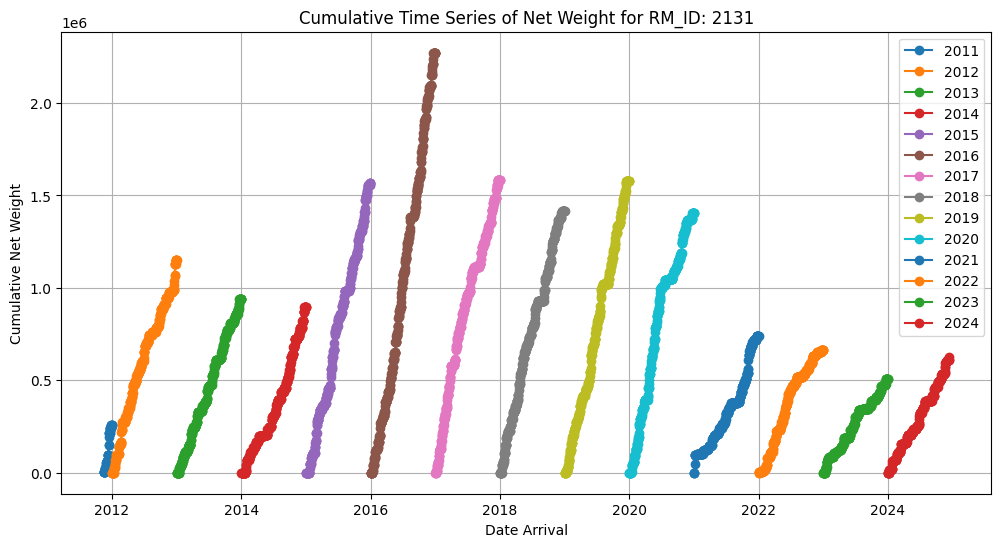

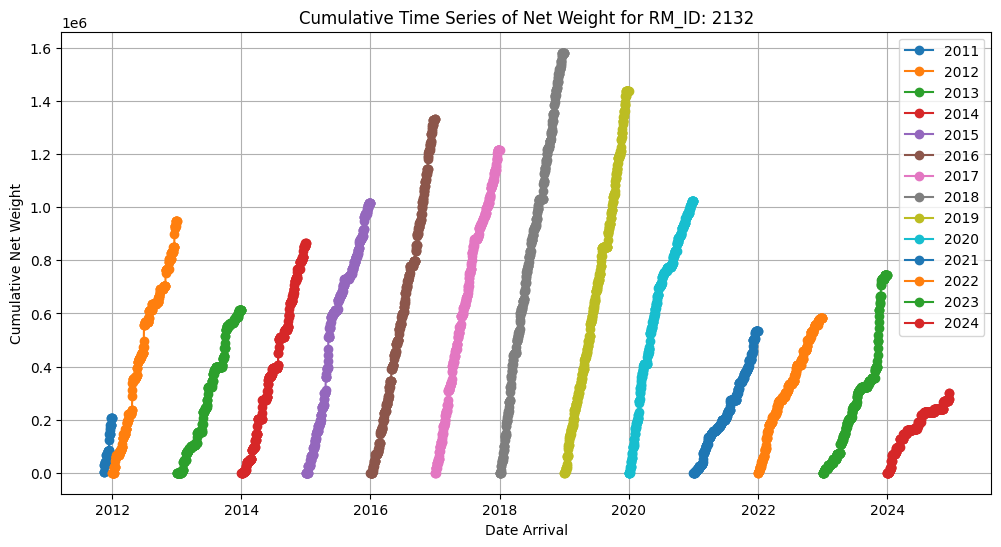

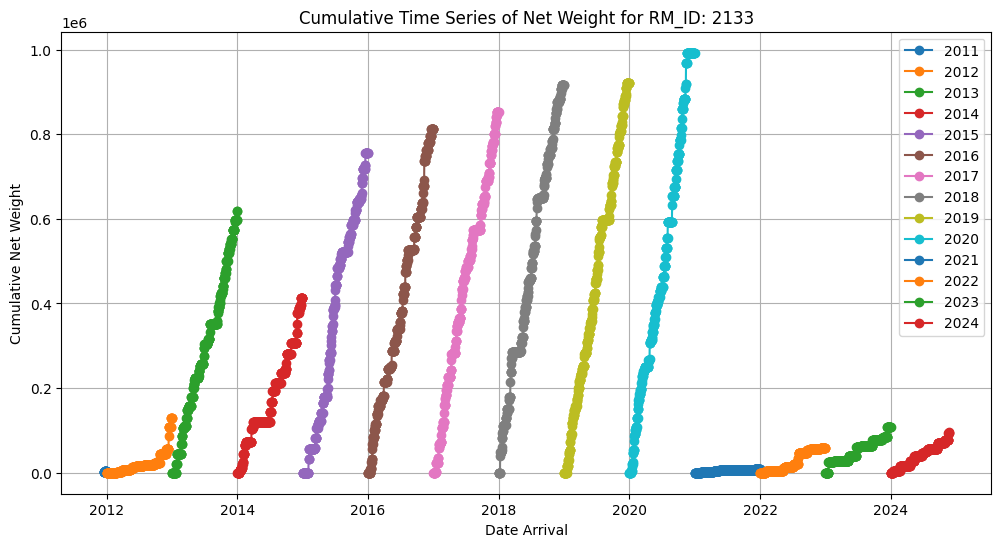

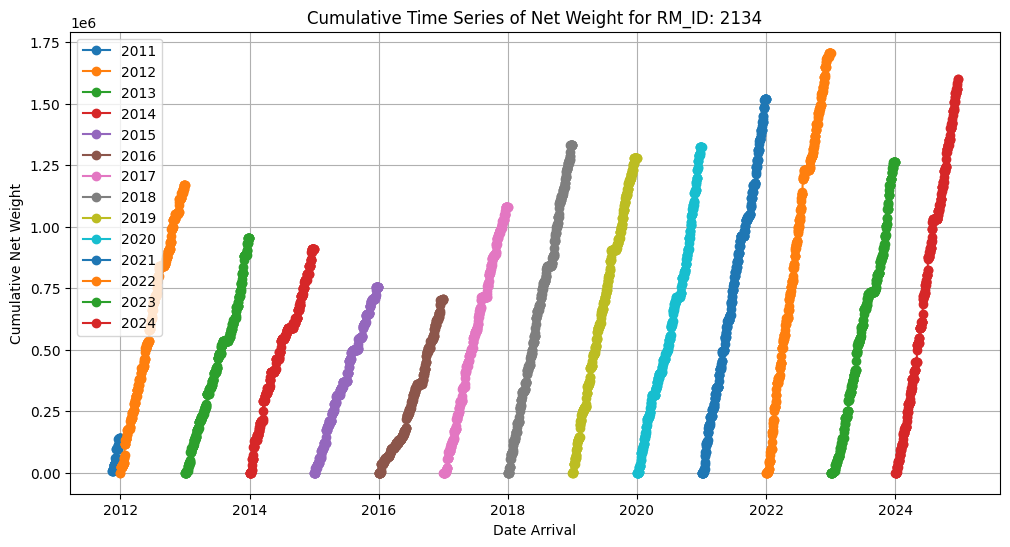

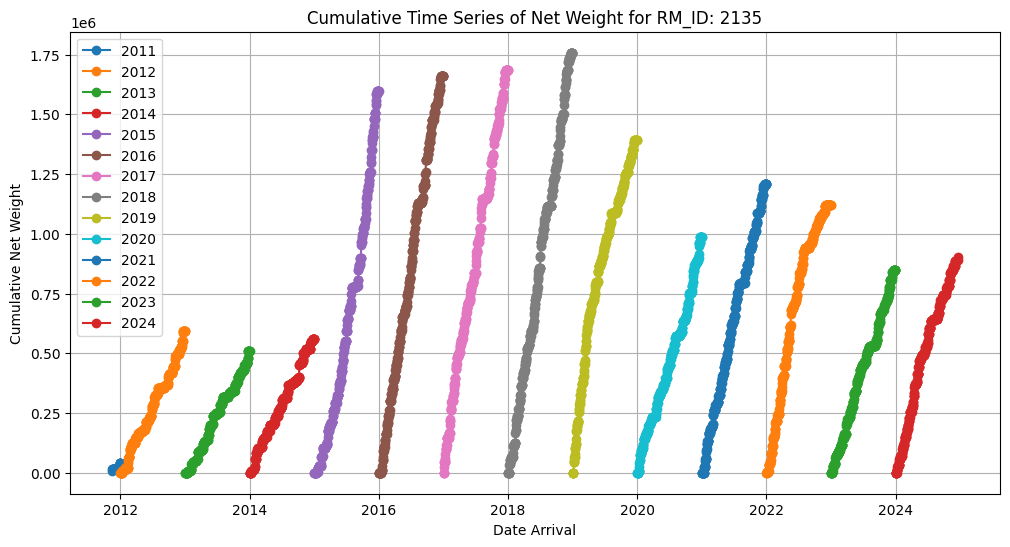

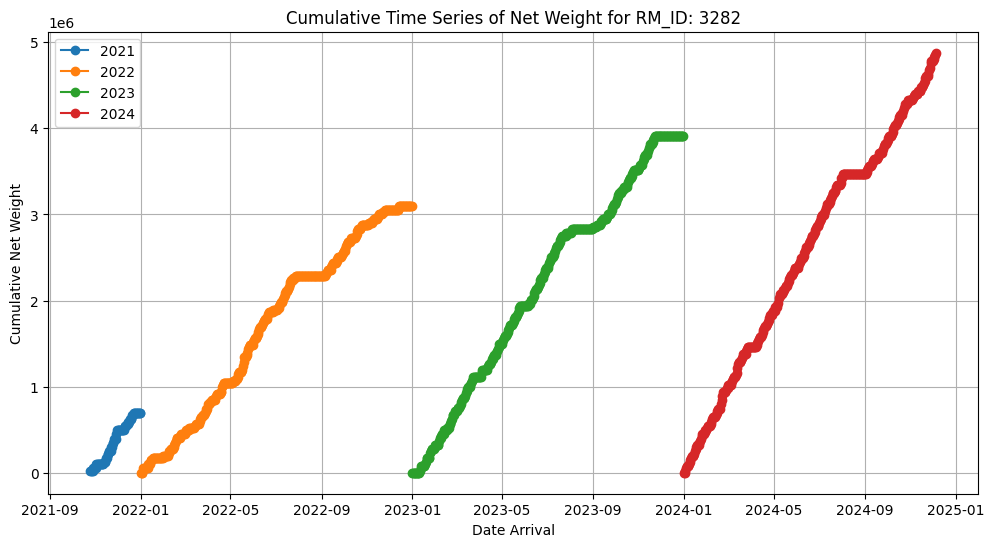

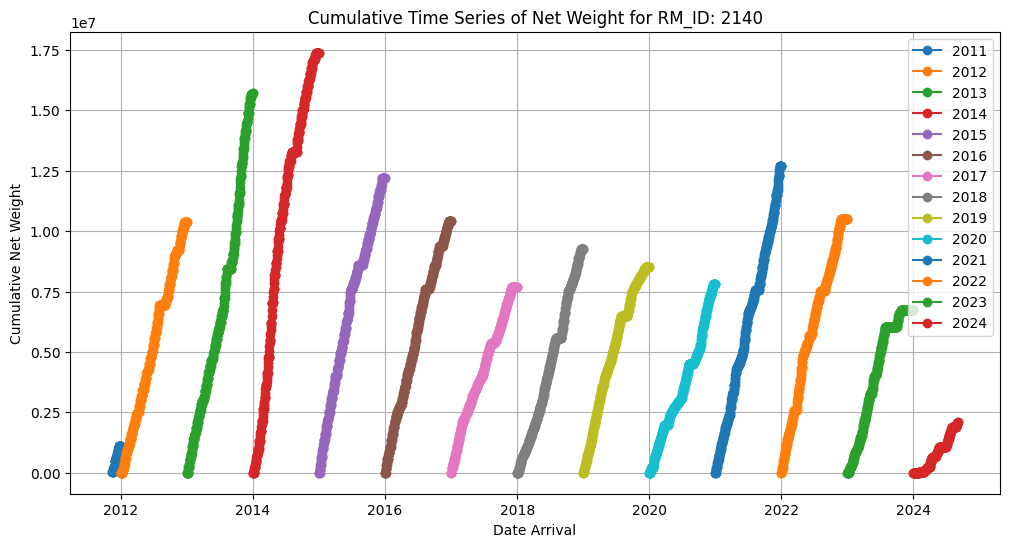

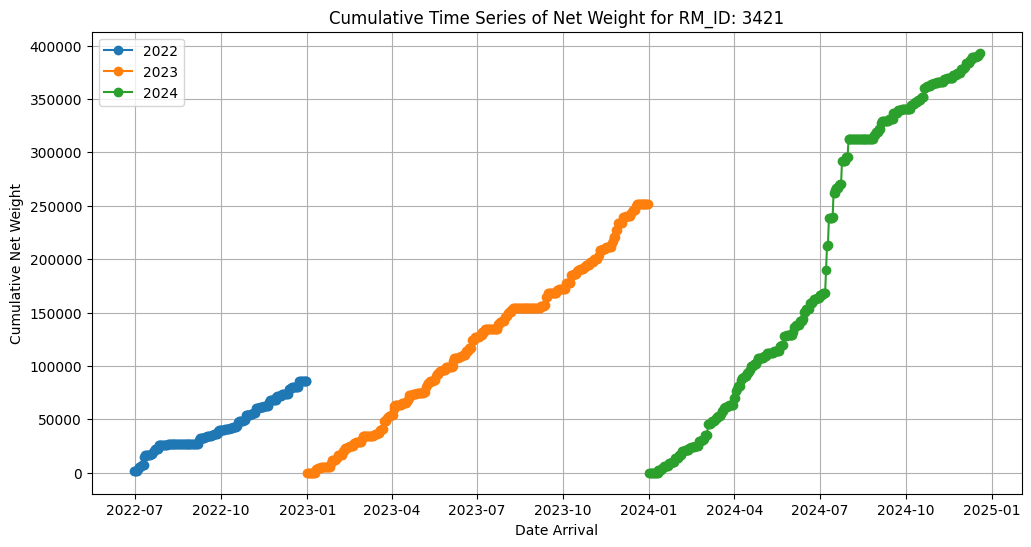

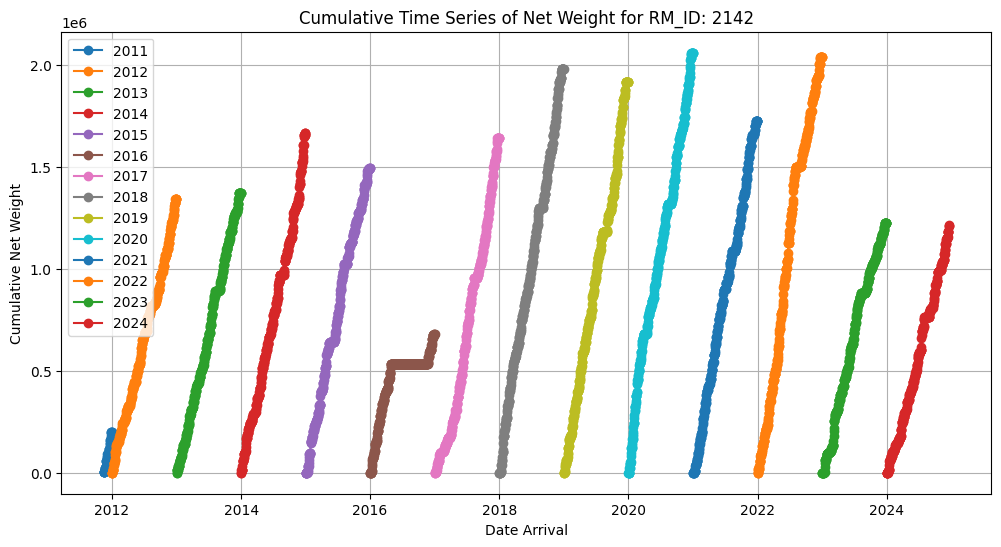

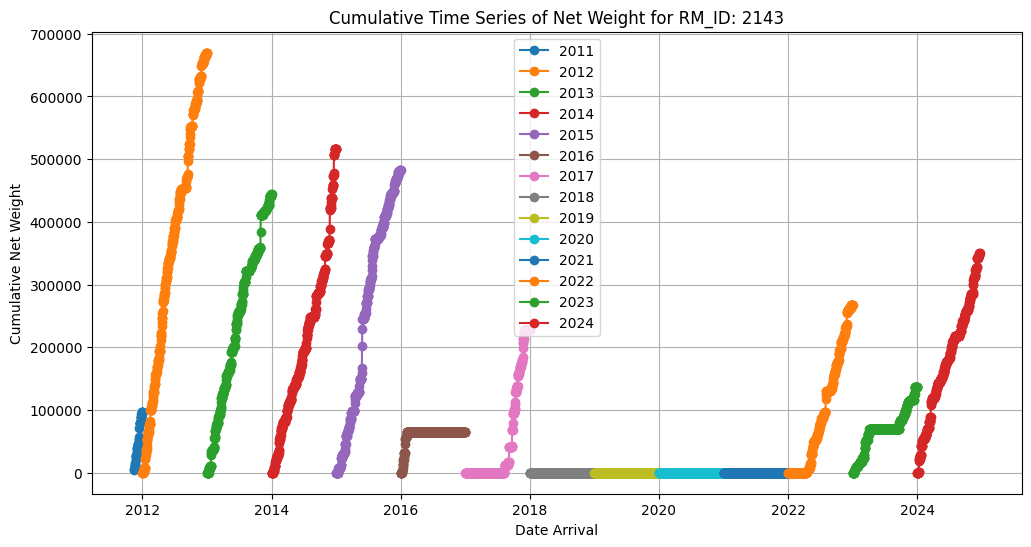

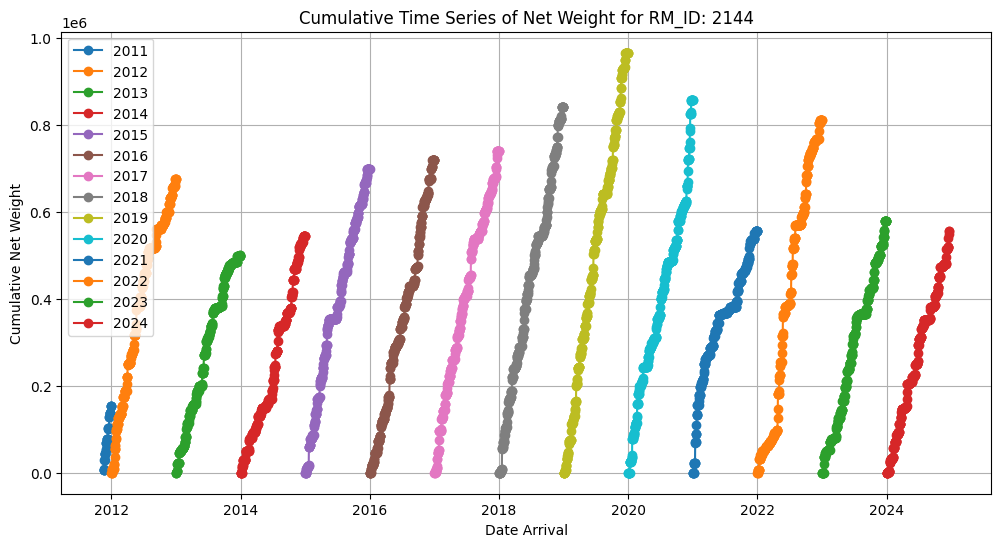

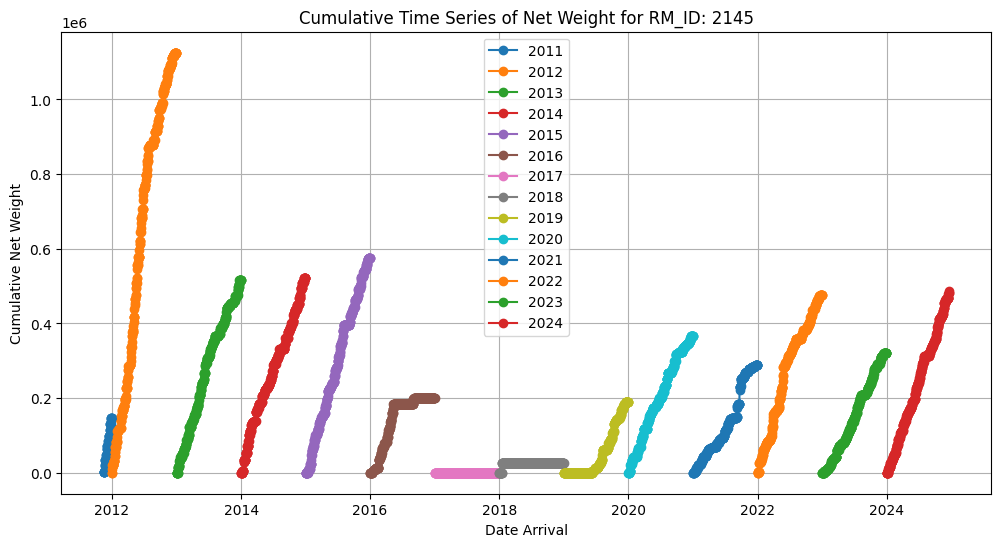

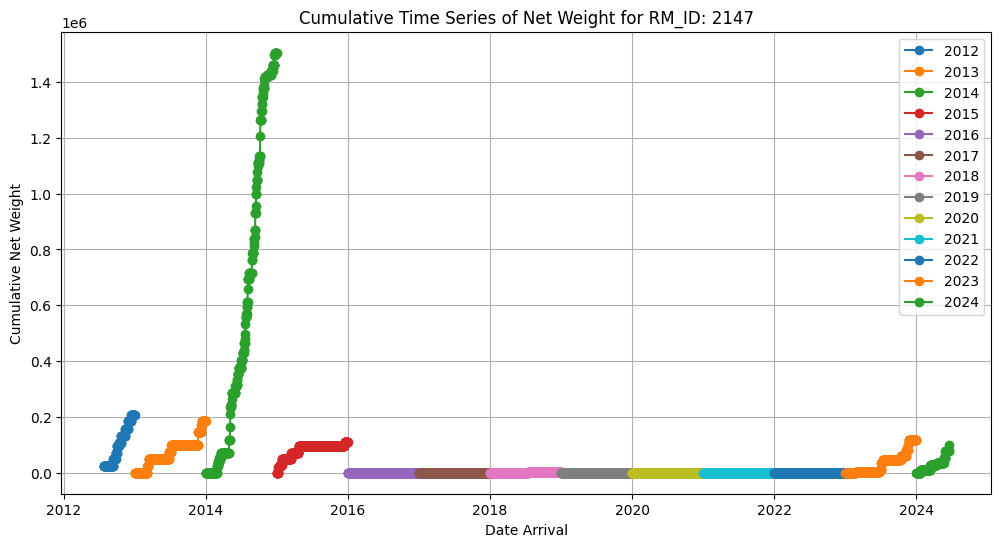

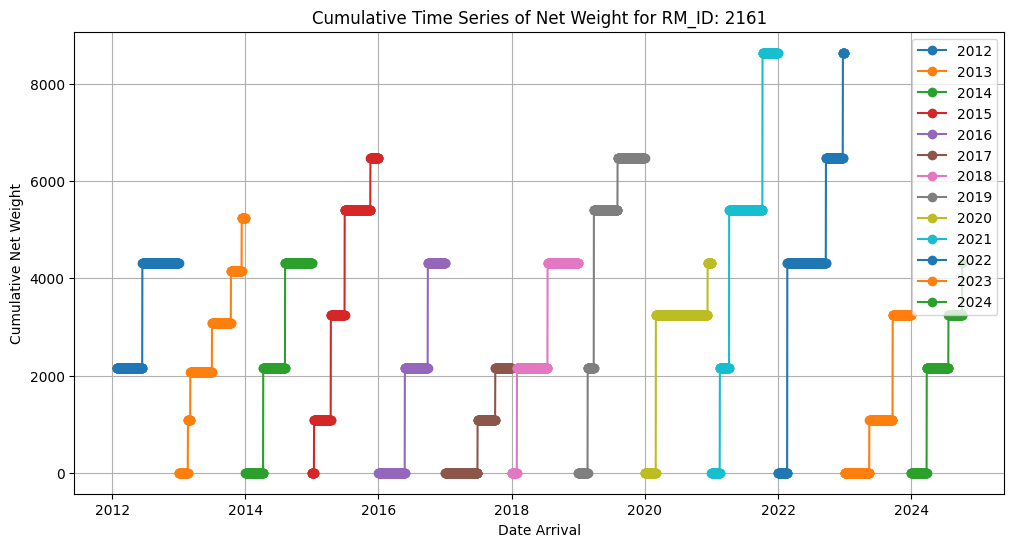

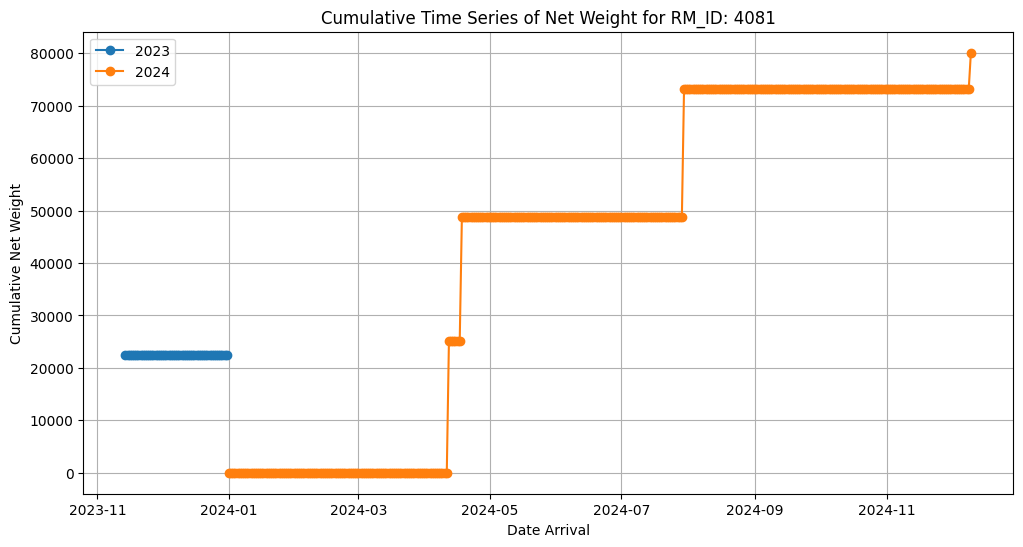

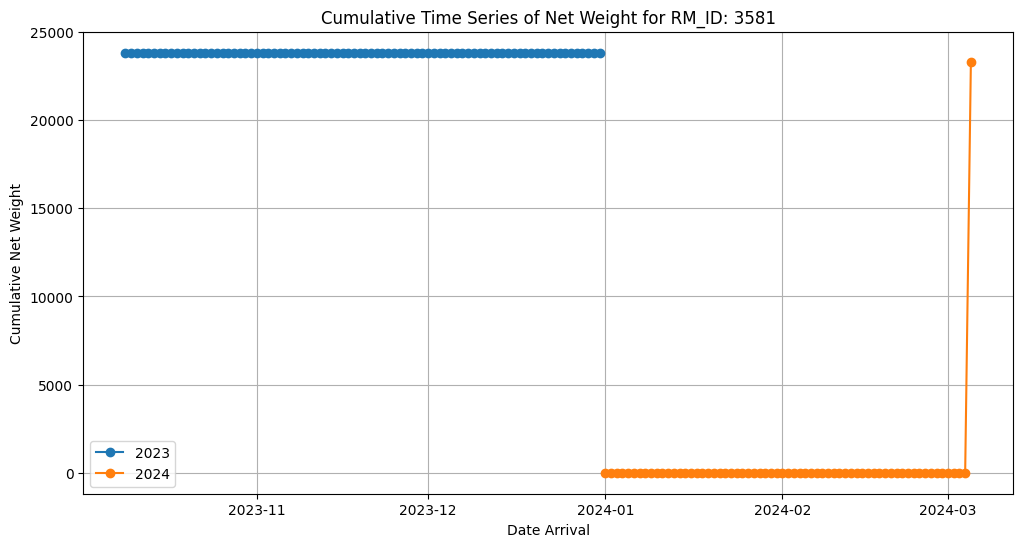

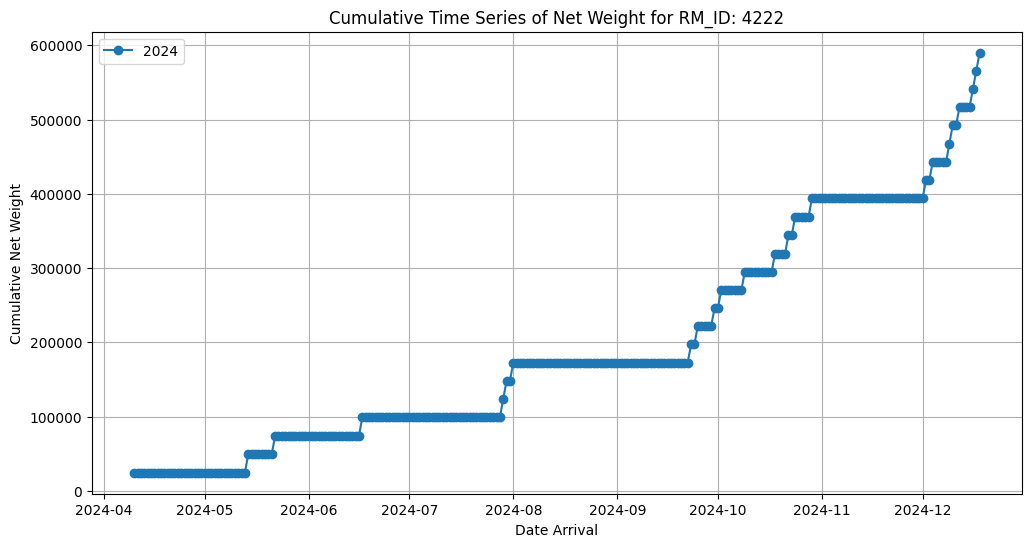

In [33]:
for rm_id in used:
    plot_rm_id_time_series(rm_id)